In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

**Preparing data**

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)

y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

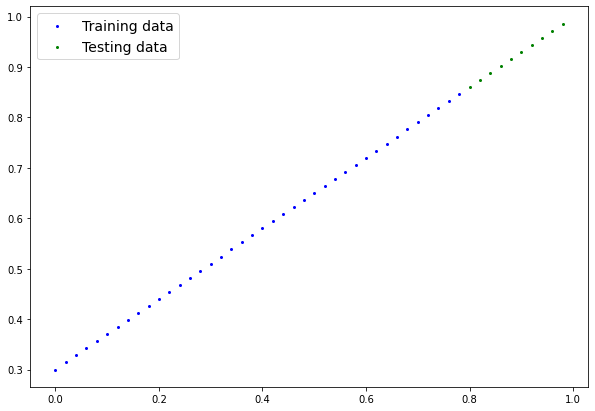

In [5]:
plot_predictions()

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel,self).__init__()

    # self.weights = nn.Parameter(torch.rand(1,
    #                              requires_grad=True,
    #                              dtype = torch.float))
     
    # self.bias = nn.Parameter(torch.rand(1,
    #                              requires_grad=True,
    #                              dtype = torch.float))
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

     
  # def forward(self, x: torch.Tensor) -> torch.Tensor:
  #   return self.weights * x + self.bias
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [7]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True), Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)

# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

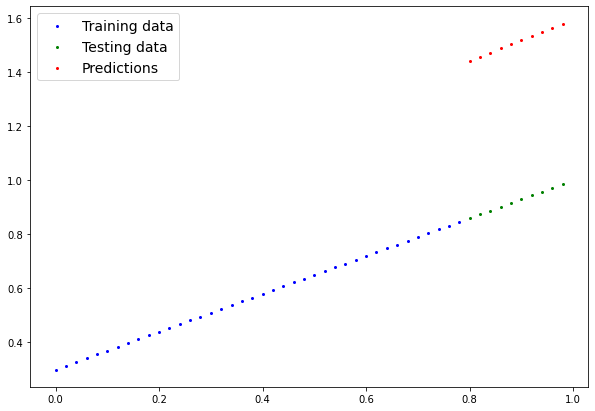

In [10]:
plot_predictions(predictions=y_preds)

**Train data**

In [14]:
import numpy as np
criterion = nn.L1Loss()

In [15]:
from tqdm import tqdm
torch.manual_seed(42)
# Epochs (number of updates) at 200
epochs = 200

# X_train = X_train.to(device)
# y_train = y_train_to(device)



tmp = 1e9
mapping = {}

#Requirement"numpy.linspace" is here
lr_list = list(np.linspace(0., 0.0005, 100))

for lr in tqdm(lr_list):
  torch.manual_seed(42)
  model_0 = LinearRegressionModel()
  optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = lr)
  epoch_count = []
  loss_values = []
  test_loss_values = []

  for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    loss = criterion(y_pred, y_train)
    print(f"Loss:{loss}")

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
      test_pred = model_0(X_test)

      test_loss = criterion(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      print(model_0.state_dict())
    
  min_loss = min(tmp,loss)
  tmp = loss
  mapping[loss] = lr


  0%|          | 0/100 [00:00<?, ?it/s]

Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Epoch: 10 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Epoch: 20 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.

  1%|          | 1/100 [00:00<00:31,  3.15it/s]

Loss:0.5551779866218567
Epoch: 130 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Epoch: 140 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Loss:0.5551779866218567
Epoch: 150 | Loss: 0.5551779866218567 | Test loss: 0.5874472260475159
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor

  2%|▏         | 2/100 [00:00<00:33,  2.92it/s]

Loss:0.5542386770248413
Loss:0.5542329549789429
Loss:0.5542270541191101
Loss:0.5542212724685669
Loss:0.5542153716087341
Loss:0.5542095303535461
Loss:0.5542038083076477
Loss:0.5541979074478149
Loss:0.554192066192627
Loss:0.554186224937439
Epoch: 170 | Loss: 0.554186224937439 | Test loss: 0.586281418800354
OrderedDict([('linear_layer.weight', tensor([[0.7642]])), ('linear_layer.bias', tensor([0.8291]))])
Loss:0.554180383682251
Loss:0.554174542427063
Loss:0.554168701171875
Loss:0.554162859916687
Loss:0.554157018661499
Loss:0.5541512370109558
Loss:0.5541454553604126
Loss:0.5541395545005798
Loss:0.5541337728500366
Loss:0.5541279315948486
Epoch: 180 | Loss: 0.5541279315948486 | Test loss: 0.5862132906913757
OrderedDict([('linear_layer.weight', tensor([[0.7642]])), ('linear_layer.bias', tensor([0.8291]))])
Loss:0.5541220307350159
Loss:0.5541162490844727
Loss:0.5541104078292847
Loss:0.5541045069694519
Loss:0.5540987253189087
Loss:0.5540928840637207
Loss:0.5540870428085327
Loss:0.55408126115798

  3%|▎         | 3/100 [00:01<00:33,  2.92it/s]

Loss:0.5542957186698914
Loss:0.5542841553688049
Loss:0.5542725324630737
Loss:0.5542609095573425
Loss:0.5542492866516113
Epoch: 80 | Loss: 0.5542492866516113 | Test loss: 0.5863476991653442
OrderedDict([('linear_layer.weight', tensor([[0.7642]])), ('linear_layer.bias', tensor([0.8292]))])
Loss:0.5542377233505249
Loss:0.5542261004447937
Loss:0.5542145371437073
Loss:0.5542029142379761
Loss:0.5541912913322449
Loss:0.5541797280311584
Loss:0.5541681051254272
Loss:0.554156482219696
Loss:0.5541449189186096
Loss:0.5541332960128784
Epoch: 90 | Loss: 0.5541332960128784 | Test loss: 0.5862119197845459
OrderedDict([('linear_layer.weight', tensor([[0.7642]])), ('linear_layer.bias', tensor([0.8291]))])
Loss:0.5541216135025024
Loss:0.5541101098060608
Loss:0.5540984869003296
Loss:0.5540868043899536
Loss:0.5540752410888672
Loss:0.554063618183136
Loss:0.5540519952774048
Loss:0.5540404319763184
Loss:0.5540288090705872
Loss:0.5540172457695007
Epoch: 100 | Loss: 0.5540172457695007 | Test loss: 0.58607614040

  4%|▍         | 4/100 [00:01<00:31,  3.02it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7638]])), ('linear_layer.bias', tensor([0.8280]))])
Loss:0.5528931617736816
Loss:0.5528756976127625
Loss:0.552858293056488
Loss:0.5528408885002136
Loss:0.5528234243392944
Loss:0.5528059601783752
Loss:0.552788496017456
Loss:0.5527711510658264
Loss:0.5527536869049072
Loss:0.5527362823486328
Epoch: 140 | Loss: 0.5527362823486328 | Test loss: 0.5845720171928406
OrderedDict([('linear_layer.weight', tensor([[0.7637]])), ('linear_layer.bias', tensor([0.8279]))])
Loss:0.5527187585830688
Loss:0.5527013540267944
Loss:0.55268394947052
Loss:0.5526664853096008
Loss:0.5526490211486816
Loss:0.5526315569877625
Loss:0.5526140928268433
Loss:0.5525966882705688
Loss:0.5525792241096497
Loss:0.5525618195533752
Epoch: 150 | Loss: 0.5525618195533752 | Test loss: 0.584368109703064
OrderedDict([('linear_layer.weight', tensor([[0.7636]])), ('linear_layer.bias', tensor([0.8277]))])
Loss:0.552544355392456
Loss:0.5525269508361816
Loss:0.5525094270706177
Loss:0.5524920

  5%|▌         | 5/100 [00:01<00:31,  3.03it/s]

Loss:0.5506858825683594
Loss:0.550662636756897
Loss:0.5506394505500793
Loss:0.5506161451339722
Loss:0.5505928993225098
Loss:0.5505695939064026
Loss:0.5505463480949402
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5874131917953491
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Loss:0.5551488399505615
Loss:0.5551196932792664
Loss:0.555090606212616
Loss:0.5550614595413208
Loss:0.5550323724746704
Loss:0.55500328540802
Loss:0.5549741983413696
Loss:0.5549451112747192
Loss:0.5549160242080688
Loss:0.5548868179321289
Epoch: 10 | Loss: 0.5548868179321289 | Test loss: 0.5870729088783264
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8297]))])
Loss:0.5548577308654785
Loss:0.5548286437988281
Loss:0.554799497127533
Loss:0.5547704100608826
Loss:0.5547413229942322
Loss:0.554712176322937
Loss:0.5546831488609314
Loss:0.5546540021896362
Loss:0.5546249151229858
Loss:0.55459582805633

  6%|▌         | 6/100 [00:01<00:30,  3.08it/s]

Loss:0.5514521598815918
Loss:0.5514229536056519
Loss:0.5513938665390015
Epoch: 130 | Loss: 0.5513938665390015 | Test loss: 0.5829898715019226
OrderedDict([('linear_layer.weight', tensor([[0.7633]])), ('linear_layer.bias', tensor([0.8267]))])
Loss:0.5513647794723511
Loss:0.5513356924057007
Loss:0.5513066053390503
Loss:0.5512774586677551
Loss:0.5512484312057495
Loss:0.5512192845344543
Loss:0.551190197467804
Loss:0.5511611104011536
Loss:0.5511319041252136
Loss:0.5511028170585632
Epoch: 140 | Loss: 0.5511028170585632 | Test loss: 0.5826495885848999
OrderedDict([('linear_layer.weight', tensor([[0.7632]])), ('linear_layer.bias', tensor([0.8264]))])
Loss:0.5510736703872681
Loss:0.5510445833206177
Loss:0.5510154962539673
Loss:0.5509864091873169
Loss:0.5509573221206665
Loss:0.5509281158447266
Loss:0.5508991479873657
Loss:0.5508699417114258
Loss:0.5508407950401306
Loss:0.550811767578125
Epoch: 150 | Loss: 0.550811767578125 | Test loss: 0.582309365272522
OrderedDict([('linear_layer.weight', tenso

  7%|▋         | 7/100 [00:02<00:30,  3.08it/s]

Loss:0.5487945675849915
Loss:0.5487596988677979
Loss:0.5487247705459595
Loss:0.5486899614334106
Loss:0.5486549735069275
Loss:0.5486201047897339
Loss:0.5485852956771851
Loss:0.5485504269599915
Epoch: 190 | Loss: 0.5485504269599915 | Test loss: 0.5796577334403992
OrderedDict([('linear_layer.weight', tensor([[0.7623]])), ('linear_layer.bias', tensor([0.8242]))])
Loss:0.5485154986381531
Loss:0.5484806299209595
Loss:0.5484457015991211
Loss:0.5484108328819275
Loss:0.5483759045600891
Loss:0.5483410954475403
Loss:0.5483061671257019
Loss:0.5482712984085083
Loss:0.5482364296913147
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5873996615409851
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Loss:0.5551372170448303
Loss:0.5550965070724487
Loss:0.5550557374954224
Loss:0.5550150871276855
Loss:0.5549743175506592
Loss:0.5549336671829224
Loss:0.5548929572105408
Loss:0.5548521876335144
Loss:0.5548114776611328
Loss:0.5547707

  8%|▊         | 8/100 [00:02<00:29,  3.13it/s]

Loss:0.5504956841468811
Loss:0.5504549145698547
Loss:0.5504142045974731
Loss:0.5503734946250916
Loss:0.5503328442573547
Loss:0.5502920150756836
Epoch: 120 | Loss: 0.5502920150756836 | Test loss: 0.5816876888275146
OrderedDict([('linear_layer.weight', tensor([[0.7629]])), ('linear_layer.bias', tensor([0.8257]))])
Loss:0.5502513647079468
Loss:0.5502106547355652
Loss:0.5501700043678284
Loss:0.5501291751861572
Loss:0.5500884652137756
Loss:0.5500478148460388
Loss:0.5500071048736572
Loss:0.5499663949012756
Loss:0.549925684928894
Loss:0.5498849153518677
Epoch: 130 | Loss: 0.5498849153518677 | Test loss: 0.5812116861343384
OrderedDict([('linear_layer.weight', tensor([[0.7627]])), ('linear_layer.bias', tensor([0.8254]))])
Loss:0.5498441457748413
Loss:0.5498035550117493
Loss:0.5497627854347229
Loss:0.5497220754623413
Loss:0.5496813654899597
Loss:0.5496406555175781
Loss:0.5495999455451965
Loss:0.5495592355728149
Loss:0.5495184659957886
Loss:0.549477756023407
Epoch: 140 | Loss: 0.549477756023407 |

  9%|▉         | 9/100 [00:02<00:29,  3.12it/s]

Loss:0.5471250414848328
Loss:0.5470784902572632
Loss:0.5470318794250488
Loss:0.5469852685928345
Loss:0.5469387769699097
Loss:0.5468922257423401
Loss:0.5468456745147705
Loss:0.5467991232872009
Epoch: 180 | Loss: 0.5467991232872009 | Test loss: 0.5775977373123169
OrderedDict([('linear_layer.weight', tensor([[0.7617]])), ('linear_layer.bias', tensor([0.8227]))])
Loss:0.5467525720596313
Loss:0.5467060208320618
Loss:0.5466595888137817
Loss:0.5466129779815674
Loss:0.5465664267539978
Loss:0.5465198159217834
Loss:0.5464733242988586
Loss:0.5464267134666443
Loss:0.5463802218437195
Loss:0.5463336110115051
Epoch: 190 | Loss: 0.5463336110115051 | Test loss: 0.5770536661148071
OrderedDict([('linear_layer.weight', tensor([[0.7615]])), ('linear_layer.bias', tensor([0.8223]))])
Loss:0.5462871193885803
Loss:0.546240508556366
Loss:0.5461939573287964
Loss:0.5461474657058716
Loss:0.5461009740829468
Loss:0.5460543632507324
Loss:0.5460078716278076
Loss:0.5459612607955933
Loss:0.5459147095680237
Loss:0.555177

 10%|█         | 10/100 [00:03<00:28,  3.16it/s]

Loss:0.5496777296066284
Loss:0.5496253967285156
Loss:0.5495730638504028
Loss:0.5495206713676453
Loss:0.5494682192802429
Loss:0.5494158864021301
Epoch: 110 | Loss: 0.5494158864021301 | Test loss: 0.580650269985199
OrderedDict([('linear_layer.weight', tensor([[0.7626]])), ('linear_layer.bias', tensor([0.8250]))])
Loss:0.5493635535240173
Loss:0.549311101436615
Loss:0.5492587685585022
Loss:0.5492063164710999
Loss:0.5491539835929871
Loss:0.5491015911102295
Loss:0.5490491986274719
Loss:0.5489968061447144
Loss:0.5489444136619568
Loss:0.5488920211791992
Epoch: 120 | Loss: 0.5488920211791992 | Test loss: 0.5800378918647766
OrderedDict([('linear_layer.weight', tensor([[0.7624]])), ('linear_layer.bias', tensor([0.8245]))])
Loss:0.5488396883010864
Loss:0.5487872958183289
Loss:0.5487349033355713
Loss:0.5486825108528137
Loss:0.5486301183700562
Loss:0.5485777258872986
Loss:0.5485254526138306
Loss:0.5484730005264282
Loss:0.5484206676483154
Loss:0.5483682155609131
Epoch: 130 | Loss: 0.5483682155609131 

 11%|█         | 11/100 [00:03<00:28,  3.15it/s]

Loss:0.5454076528549194
Loss:0.5453495383262634
Loss:0.5452913045883179
Epoch: 170 | Loss: 0.5452913045883179 | Test loss: 0.575820803642273
OrderedDict([('linear_layer.weight', tensor([[0.7612]])), ('linear_layer.bias', tensor([0.8214]))])
Loss:0.5452332496643066
Loss:0.5451750159263611
Loss:0.5451169013977051
Loss:0.5450587272644043
Loss:0.5450005531311035
Loss:0.5449423789978027
Loss:0.5448843240737915
Loss:0.544826090335846
Loss:0.5447679758071899
Loss:0.5447098016738892
Epoch: 180 | Loss: 0.5447098016738892 | Test loss: 0.5751408338546753
OrderedDict([('linear_layer.weight', tensor([[0.7610]])), ('linear_layer.bias', tensor([0.8209]))])
Loss:0.5446516275405884
Loss:0.5445934534072876
Loss:0.5445352792739868
Loss:0.544477105140686
Loss:0.54441899061203
Loss:0.544360876083374
Loss:0.5443027019500732
Loss:0.5442445874214172
Loss:0.5441864132881165
Loss:0.5441282987594604
Epoch: 190 | Loss: 0.5441282987594604 | Test loss: 0.5744609832763672
OrderedDict([('linear_layer.weight', tensor(

 12%|█▏        | 12/100 [00:03<00:27,  3.17it/s]

Loss:0.5490967035293579
Loss:0.5490326285362244
Loss:0.5489686727523804
Loss:0.5489045977592468
Loss:0.5488407015800476
Loss:0.5487766265869141
Epoch: 100 | Loss: 0.5487766265869141 | Test loss: 0.5798861980438232
OrderedDict([('linear_layer.weight', tensor([[0.7623]])), ('linear_layer.bias', tensor([0.8244]))])
Loss:0.5487126111984253
Loss:0.5486486554145813
Loss:0.5485845804214478
Loss:0.548520565032959
Loss:0.5484565496444702
Loss:0.5483925342559814
Loss:0.5483285188674927
Loss:0.5482646226882935
Loss:0.5482004880905151
Loss:0.5481364727020264
Epoch: 110 | Loss: 0.5481364727020264 | Test loss: 0.5791376233100891
OrderedDict([('linear_layer.weight', tensor([[0.7621]])), ('linear_layer.bias', tensor([0.8238]))])
Loss:0.5480724573135376
Loss:0.5480084419250488
Loss:0.5479444265365601
Loss:0.5478805303573608
Loss:0.5478163957595825
Loss:0.5477523803710938
Loss:0.547688364982605
Loss:0.547624409198761
Loss:0.5475603938102722
Loss:0.5474963784217834
Epoch: 120 | Loss: 0.5474963784217834 |

 13%|█▎        | 13/100 [00:04<00:27,  3.14it/s]

Loss:0.5440723299980164
Loss:0.5440024733543396
Epoch: 160 | Loss: 0.5440024733543396 | Test loss: 0.5742970705032349
OrderedDict([('linear_layer.weight', tensor([[0.7607]])), ('linear_layer.bias', tensor([0.8202]))])
Loss:0.5439327359199524
Loss:0.5438627600669861
Loss:0.5437929630279541
Loss:0.5437231063842773
Loss:0.5436533093452454
Loss:0.5435833930969238
Loss:0.5435135364532471
Loss:0.5434436798095703
Loss:0.5433738827705383
Loss:0.5433040857315063
Epoch: 170 | Loss: 0.5433040857315063 | Test loss: 0.5734802484512329
OrderedDict([('linear_layer.weight', tensor([[0.7605]])), ('linear_layer.bias', tensor([0.8196]))])
Loss:0.5432342290878296
Loss:0.5431643724441528
Loss:0.5430944561958313
Loss:0.5430246591567993
Loss:0.5429548025131226
Loss:0.5428849458694458
Loss:0.542815089225769
Loss:0.5427452325820923
Loss:0.5426753759384155
Loss:0.5426055788993835
Epoch: 180 | Loss: 0.5426055788993835 | Test loss: 0.572663426399231
OrderedDict([('linear_layer.weight', tensor([[0.7603]])), ('line

 14%|█▍        | 14/100 [00:04<00:27,  3.16it/s]

Loss:0.5486694574356079
Loss:0.5485938191413879
Loss:0.5485180616378784
Loss:0.5484424233436584
Loss:0.5483666658401489
Epoch: 90 | Loss: 0.5483666658401489 | Test loss: 0.5793941020965576
OrderedDict([('linear_layer.weight', tensor([[0.7622]])), ('linear_layer.bias', tensor([0.8240]))])
Loss:0.5482910871505737
Loss:0.548215389251709
Loss:0.5481396913528442
Loss:0.5480639338493347
Loss:0.5479883551597595
Loss:0.5479127168655396
Loss:0.54783695936203
Loss:0.5477612614631653
Loss:0.5476856231689453
Loss:0.5476099252700806
Epoch: 100 | Loss: 0.5476099252700806 | Test loss: 0.5785092115402222
OrderedDict([('linear_layer.weight', tensor([[0.7619]])), ('linear_layer.bias', tensor([0.8234]))])
Loss:0.5475342273712158
Loss:0.5474585294723511
Loss:0.5473828315734863
Loss:0.5473071932792664
Loss:0.5472315549850464
Loss:0.5471557974815369
Loss:0.5470802187919617
Loss:0.5470044612884521
Loss:0.5469287633895874
Loss:0.5468531250953674
Epoch: 110 | Loss: 0.5468531250953674 | Test loss: 0.57762426137

 15%|█▌        | 15/100 [00:04<00:26,  3.20it/s]


Loss:0.5422267913818359
Loss:0.542145311832428
Epoch: 160 | Loss: 0.542145311832428 | Test loss: 0.5721115469932556
OrderedDict([('linear_layer.weight', tensor([[0.7601]])), ('linear_layer.bias', tensor([0.8186]))])
Loss:0.5420638918876648
Loss:0.5419824123382568
Loss:0.5419009327888489
Loss:0.5418194532394409
Loss:0.541737973690033
Loss:0.5416566133499146
Loss:0.5415751338005066
Loss:0.5414937138557434
Loss:0.5414122343063354
Loss:0.5413307547569275
Epoch: 170 | Loss: 0.5413307547569275 | Test loss: 0.5711590647697449
OrderedDict([('linear_layer.weight', tensor([[0.7598]])), ('linear_layer.bias', tensor([0.8179]))])
Loss:0.5412492752075195
Loss:0.5411678552627563
Loss:0.5410863757133484
Loss:0.5410049557685852
Loss:0.5409234762191772
Loss:0.5408421158790588
Loss:0.5407606363296509
Loss:0.5406791567802429
Loss:0.540597677230835
Loss:0.540516197681427
Epoch: 180 | Loss: 0.540516197681427 | Test loss: 0.5702065229415894
OrderedDict([('linear_layer.weight', tensor([[0.7595]])), ('linear_

 16%|█▌        | 16/100 [00:05<00:26,  3.17it/s]

Loss:0.5480203628540039
Loss:0.547933042049408
Loss:0.547845721244812
Loss:0.5477585196495056
Loss:0.5476711988449097
Loss:0.5475839376449585
Loss:0.5474966764450073
Loss:0.5474093556404114
Loss:0.5473220944404602
Epoch: 90 | Loss: 0.5473220944404602 | Test loss: 0.5781588554382324
OrderedDict([('linear_layer.weight', tensor([[0.7618]])), ('linear_layer.bias', tensor([0.8231]))])
Loss:0.5472347140312195
Loss:0.5471475124359131
Loss:0.5470601916313171
Loss:0.546972930431366
Loss:0.54688560962677
Loss:0.5467983484268188
Loss:0.5467110276222229
Loss:0.5466238260269165
Loss:0.5465364456176758
Loss:0.5464491844177246
Epoch: 100 | Loss: 0.5464491844177246 | Test loss: 0.5771381855010986
OrderedDict([('linear_layer.weight', tensor([[0.7616]])), ('linear_layer.bias', tensor([0.8224]))])
Loss:0.5463619232177734
Loss:0.5462745428085327
Loss:0.5461872816085815
Loss:0.5461000204086304
Loss:0.5460127592086792
Loss:0.545925498008728
Loss:0.5458381772041321
Loss:0.5457509160041809
Loss:0.545663595199

 17%|█▋        | 17/100 [00:05<00:26,  3.13it/s]

Loss:0.5420478582382202
Loss:0.5419546961784363
Loss:0.5418616533279419
Loss:0.5417685508728027
Loss:0.5416754484176636
Loss:0.5415822267532349
Loss:0.5414891839027405
Loss:0.5413960814476013
Loss:0.5413029789924622
Loss:0.5412098169326782
Epoch: 150 | Loss: 0.5412098169326782 | Test loss: 0.5710053443908691
OrderedDict([('linear_layer.weight', tensor([[0.7598]])), ('linear_layer.bias', tensor([0.8178]))])
Loss:0.5411166548728943
Loss:0.5410235524177551
Loss:0.540930449962616
Loss:0.540837287902832
Loss:0.5407441854476929
Loss:0.5406510829925537
Loss:0.5405579805374146
Loss:0.5404648184776306
Loss:0.5403717160224915
Loss:0.5402785539627075
Epoch: 160 | Loss: 0.5402785539627075 | Test loss: 0.5699164271354675
OrderedDict([('linear_layer.weight', tensor([[0.7595]])), ('linear_layer.bias', tensor([0.8170]))])
Loss:0.5401855111122131
Loss:0.5400923490524292
Loss:0.5399991869926453
Loss:0.5399061441421509
Loss:0.5398130416870117
Loss:0.5397198796272278
Loss:0.5396267771720886
Loss:0.5395336

 18%|█▊        | 18/100 [00:05<00:25,  3.16it/s]

Loss:0.5484530329704285
Loss:0.5483541488647461
Loss:0.5482553243637085
Epoch: 70 | Loss: 0.5482553243637085 | Test loss: 0.5792365670204163
OrderedDict([('linear_layer.weight', tensor([[0.7622]])), ('linear_layer.bias', tensor([0.8239]))])
Loss:0.5481563806533813
Loss:0.548057496547699
Loss:0.5479586124420166
Loss:0.5478597283363342
Loss:0.5477608442306519
Loss:0.5476619005203247
Loss:0.5475630164146423
Loss:0.54746413230896
Loss:0.5473653078079224
Loss:0.5472663640975952
Epoch: 80 | Loss: 0.5472663640975952 | Test loss: 0.5780800580978394
OrderedDict([('linear_layer.weight', tensor([[0.7618]])), ('linear_layer.bias', tensor([0.8231]))])
Loss:0.5471674203872681
Loss:0.5470684766769409
Loss:0.5469696521759033
Loss:0.5468708276748657
Loss:0.5467718839645386
Loss:0.5466729402542114
Loss:0.546574056148529
Loss:0.5464752316474915
Loss:0.5463763475418091
Loss:0.5462774038314819
Epoch: 90 | Loss: 0.5462774038314819 | Test loss: 0.5769236087799072
OrderedDict([('linear_layer.weight', tensor([

 19%|█▉        | 19/100 [00:06<00:25,  3.18it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7595]])), ('linear_layer.bias', tensor([0.8172]))])
Loss:0.5404112339019775
Loss:0.5403064489364624
Loss:0.5402017831802368
Loss:0.5400970578193665
Loss:0.5399922728538513
Loss:0.5398876070976257
Loss:0.5397828817367554
Loss:0.5396782159805298
Loss:0.5395733714103699
Loss:0.5394686460494995
Epoch: 150 | Loss: 0.5394686460494995 | Test loss: 0.5689556002616882
OrderedDict([('linear_layer.weight', tensor([[0.7592]])), ('linear_layer.bias', tensor([0.8163]))])
Loss:0.5393639802932739
Loss:0.539259135723114
Loss:0.5391544699668884
Loss:0.5390498042106628
Loss:0.5389450192451477
Loss:0.5388402938842773
Loss:0.538735568523407
Loss:0.5386308431625366
Loss:0.5385261178016663
Loss:0.5384213924407959
Epoch: 160 | Loss: 0.5384213924407959 | Test loss: 0.5677310228347778
OrderedDict([('linear_layer.weight', tensor([[0.7588]])), ('linear_layer.bias', tensor([0.8154]))])
Loss:0.5383166670799255
Loss:0.5382118821144104
Loss:0.5381072163581848
Loss:0.538

 20%|██        | 20/100 [00:06<00:24,  3.21it/s]

Loss:0.5466646552085876
Loss:0.5465540885925293
Loss:0.546443521976471
Loss:0.5463330149650574
Epoch: 80 | Loss: 0.5463330149650574 | Test loss: 0.5769757032394409
OrderedDict([('linear_layer.weight', tensor([[0.7615]])), ('linear_layer.bias', tensor([0.8222]))])
Loss:0.546222448348999
Loss:0.5461118817329407
Loss:0.5460013151168823
Loss:0.545890748500824
Loss:0.5457801818847656
Loss:0.5456696152687073
Loss:0.5455591082572937
Loss:0.5454484820365906
Loss:0.5453378558158875
Loss:0.5452274084091187
Epoch: 90 | Loss: 0.5452274084091187 | Test loss: 0.5756829977035522
OrderedDict([('linear_layer.weight', tensor([[0.7611]])), ('linear_layer.bias', tensor([0.8213]))])
Loss:0.5451168417930603
Loss:0.545006275177002
Loss:0.5448956489562988
Loss:0.5447851419448853
Loss:0.5446745157241821
Loss:0.5445639491081238
Loss:0.5444534420967102
Loss:0.5443428754806519
Loss:0.5442323088645935
Loss:0.5441218018531799
Epoch: 100 | Loss: 0.5441218018531799 | Test loss: 0.574390172958374
OrderedDict([('linear

 21%|██        | 21/100 [00:06<00:24,  3.26it/s]

Loss:0.5364382863044739
Loss:0.5363218188285828
Loss:0.5362054705619812
Loss:0.5360891222953796
Loss:0.5359726548194885
Loss:0.5358562469482422
Loss:0.5357398986816406
Loss:0.5356234908103943
Loss:0.535507082939148
Loss:0.5353907346725464
Epoch: 170 | Loss: 0.5353907346725464 | Test loss: 0.564175009727478
OrderedDict([('linear_layer.weight', tensor([[0.7578]])), ('linear_layer.bias', tensor([0.8127]))])
Loss:0.5352743864059448
Loss:0.5351579189300537
Loss:0.5350415110588074
Loss:0.5349251627922058
Loss:0.5348087549209595
Loss:0.5346923470497131
Loss:0.5345759391784668
Loss:0.5344595909118652
Loss:0.5343431234359741
Loss:0.5342267751693726
Epoch: 180 | Loss: 0.5342267751693726 | Test loss: 0.5628140568733215
OrderedDict([('linear_layer.weight', tensor([[0.7574]])), ('linear_layer.bias', tensor([0.8117]))])
Loss:0.5341103672981262
Loss:0.5339940190315247
Loss:0.5338776111602783
Loss:0.533761203289032
Loss:0.5336447954177856
Loss:0.5335284471511841
Loss:0.533411979675293
Loss:0.533295571

 22%|██▏       | 22/100 [00:06<00:23,  3.27it/s]

Loss:0.5435718297958374
Loss:0.5434496998786926
Loss:0.5433274507522583
Loss:0.5432053804397583
Loss:0.543083131313324
Loss:0.5429610013961792
Epoch: 100 | Loss: 0.5429610013961792 | Test loss: 0.5730191469192505
OrderedDict([('linear_layer.weight', tensor([[0.7604]])), ('linear_layer.bias', tensor([0.8193]))])
Loss:0.5428389310836792
Loss:0.5427166223526001
Loss:0.5425945520401001
Loss:0.5424723625183105
Loss:0.5423501133918762
Loss:0.5422280430793762
Loss:0.5421057939529419
Loss:0.5419836640357971
Loss:0.5418614745140076
Loss:0.5417393445968628
Epoch: 110 | Loss: 0.5417393445968628 | Test loss: 0.5715906620025635
OrderedDict([('linear_layer.weight', tensor([[0.7599]])), ('linear_layer.bias', tensor([0.8182]))])
Loss:0.5416170954704285
Loss:0.5414949655532837
Loss:0.5413728356361389
Loss:0.5412506461143494
Loss:0.5411284565925598
Loss:0.541006326675415
Loss:0.5408840775489807
Loss:0.5407618880271912
Loss:0.5406397581100464
Loss:0.5405176281929016
Epoch: 120 | Loss: 0.5405176281929016 

 23%|██▎       | 23/100 [00:07<00:23,  3.27it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7571]])), ('linear_layer.bias', tensor([0.8110]))])
Loss:0.5332894325256348
Loss:0.533161461353302
Loss:0.5330334901809692
Loss:0.5329054594039917
Loss:0.5327774286270142
Loss:0.5326494574546814
Loss:0.5325214266777039
Loss:0.5323934555053711
Loss:0.5322654843330383
Loss:0.5321374535560608
Epoch: 180 | Loss: 0.5321374535560608 | Test loss: 0.5603570938110352
OrderedDict([('linear_layer.weight', tensor([[0.7567]])), ('linear_layer.bias', tensor([0.8099]))])
Loss:0.5320094227790833
Loss:0.5318814516067505
Loss:0.531753420829773
Loss:0.5316253900527954
Loss:0.5314974784851074
Loss:0.5313693881034851
Loss:0.5312414169311523
Loss:0.5311133861541748
Loss:0.5309854745864868
Loss:0.5308574438095093
Epoch: 190 | Loss: 0.5308574438095093 | Test loss: 0.5588604211807251
OrderedDict([('linear_layer.weight', tensor([[0.7563]])), ('linear_layer.bias', tensor([0.8088]))])
Loss:0.5307294130325317
Loss:0.5306013822555542
Loss:0.5304733514785767
Loss:0.530

 24%|██▍       | 24/100 [00:07<00:23,  3.24it/s]

Loss:0.5419281125068665
Loss:0.5417943000793457
Epoch: 100 | Loss: 0.5417943000793457 | Test loss: 0.5716421008110046
OrderedDict([('linear_layer.weight', tensor([[0.7600]])), ('linear_layer.bias', tensor([0.8183]))])
Loss:0.5416604280471802
Loss:0.5415266752243042
Loss:0.5413928031921387
Loss:0.5412589311599731
Loss:0.5411251187324524
Loss:0.5409913063049316
Loss:0.5408574342727661
Loss:0.5407236218452454
Loss:0.5405898094177246
Loss:0.5404559373855591
Epoch: 110 | Loss: 0.5404559373855591 | Test loss: 0.5700773000717163
OrderedDict([('linear_layer.weight', tensor([[0.7595]])), ('linear_layer.bias', tensor([0.8171]))])
Loss:0.5403221249580383
Loss:0.5401882529258728
Loss:0.540054440498352
Loss:0.5399206280708313
Loss:0.5397867560386658
Loss:0.539652943611145
Loss:0.5395190715789795
Loss:0.5393852591514587
Loss:0.539251446723938
Loss:0.5391175746917725
Epoch: 120 | Loss: 0.5391175746917725 | Test loss: 0.5685123801231384
OrderedDict([('linear_layer.weight', tensor([[0.7591]])), ('linea

 25%|██▌       | 25/100 [00:07<00:22,  3.27it/s]

Loss:0.5305960774421692
Loss:0.5304563641548157
Loss:0.5303167104721069
Loss:0.5301769971847534
Loss:0.5300373435020447
Epoch: 180 | Loss: 0.5300373435020447 | Test loss: 0.5578893423080444
OrderedDict([('linear_layer.weight', tensor([[0.7560]])), ('linear_layer.bias', tensor([0.8081]))])
Loss:0.5298976898193359
Loss:0.5297580361366272
Loss:0.5296183824539185
Loss:0.5294787287712097
Loss:0.5293390154838562
Loss:0.5291993618011475
Loss:0.5290597081184387
Loss:0.5289199948310852
Loss:0.5287803411483765
Loss:0.5286406874656677
Epoch: 190 | Loss: 0.5286406874656677 | Test loss: 0.5562563538551331
OrderedDict([('linear_layer.weight', tensor([[0.7555]])), ('linear_layer.bias', tensor([0.8069]))])
Loss:0.528501033782959
Loss:0.5283613204956055
Loss:0.5282216668128967
Loss:0.528082013130188
Loss:0.5279422998428345
Loss:0.5278026461601257
Loss:0.527662992477417
Loss:0.5275232791900635
Loss:0.5273836255073547
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.587277173995

 26%|██▌       | 26/100 [00:08<00:22,  3.30it/s]

Loss:0.5388882756233215
Loss:0.5387428402900696
Loss:0.5385974049568176
Loss:0.5384518504142761
Loss:0.5383065342903137
Loss:0.538161039352417
Loss:0.5380155444145203
Loss:0.5378701090812683
Loss:0.5377246737480164
Epoch: 120 | Loss: 0.5377246737480164 | Test loss: 0.566869854927063
OrderedDict([('linear_layer.weight', tensor([[0.7586]])), ('linear_layer.bias', tensor([0.8147]))])
Loss:0.5375792384147644
Loss:0.5374338030815125
Loss:0.5372883677482605
Loss:0.5371429324150085
Loss:0.5369974374771118
Loss:0.5368520021438599
Loss:0.5367065668106079
Loss:0.536561131477356
Loss:0.536415696144104
Loss:0.536270260810852
Epoch: 130 | Loss: 0.536270260810852 | Test loss: 0.5651692748069763
OrderedDict([('linear_layer.weight', tensor([[0.7581]])), ('linear_layer.bias', tensor([0.8135]))])
Loss:0.5361248254776001
Loss:0.5359793901443481
Loss:0.5358339548110962
Loss:0.5356885194778442
Loss:0.5355430245399475
Loss:0.5353975892066956
Loss:0.5352521538734436
Loss:0.5351066589355469
Loss:0.53496128320

 27%|██▋       | 27/100 [00:08<00:22,  3.28it/s]

Loss:0.5265865325927734
Loss:0.5264352560043335
Epoch: 190 | Loss: 0.5264352560043335 | Test loss: 0.5536636114120483
OrderedDict([('linear_layer.weight', tensor([[0.7548]])), ('linear_layer.bias', tensor([0.8049]))])
Loss:0.5262839794158936
Loss:0.5261327028274536
Loss:0.5259814262390137
Loss:0.5258301496505737
Loss:0.5256789326667786
Loss:0.5255275964736938
Loss:0.5253763198852539
Loss:0.525225043296814
Loss:0.5250737071037292
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5872635245323181
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8299]))])
Loss:0.5550208687782288
Loss:0.554863691329956
Loss:0.5547066330909729
Loss:0.554549515247345
Loss:0.5543924570083618
Loss:0.5542352795600891
Loss:0.5540781617164612
Loss:0.5539210438728333
Loss:0.5537639260292053
Loss:0.5536068081855774
Epoch: 10 | Loss: 0.5536068081855774 | Test loss: 0.5854265689849854
OrderedDict([('linear_layer.weight', tensor([[0.7640]])), ('linear_l

 28%|██▊       | 28/100 [00:08<00:21,  3.31it/s]

Loss:0.5352248549461365
Loss:0.5350677371025085
Loss:0.5349105596542358
Loss:0.5347535610198975
Epoch: 130 | Loss: 0.5347535610198975 | Test loss: 0.5633832216262817
OrderedDict([('linear_layer.weight', tensor([[0.7576]])), ('linear_layer.bias', tensor([0.8121]))])
Loss:0.5345963835716248
Loss:0.5344393253326416
Loss:0.5342822074890137
Loss:0.5341251492500305
Loss:0.5339680314064026
Loss:0.5338108539581299
Loss:0.533653736114502
Loss:0.5334966778755188
Loss:0.5333395600318909
Loss:0.5331824421882629
Epoch: 140 | Loss: 0.5331824421882629 | Test loss: 0.561546266078949
OrderedDict([('linear_layer.weight', tensor([[0.7570]])), ('linear_layer.bias', tensor([0.8108]))])
Loss:0.5330252647399902
Loss:0.5328682661056519
Loss:0.5327110886573792
Loss:0.5325539708137512
Loss:0.5323969125747681
Loss:0.5322397947311401
Loss:0.532082736492157
Loss:0.5319255590438843
Loss:0.5317684412002563
Loss:0.5316113233566284
Epoch: 150 | Loss: 0.5316113233566284 | Test loss: 0.559709370136261
OrderedDict([('lin

 29%|██▉       | 29/100 [00:09<00:22,  3.15it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7551]])), ('linear_layer.bias', tensor([0.8058]))])
Loss:0.5273144841194153
Loss:0.5271515250205994
Loss:0.5269886255264282
Loss:0.5268256664276123
Loss:0.5266627073287964
Loss:0.5264997482299805
Loss:0.5263367891311646
Loss:0.5261738896369934
Loss:0.5260108709335327
Loss:0.5258479714393616
Epoch: 180 | Loss: 0.5258479714393616 | Test loss: 0.5529646873474121
OrderedDict([('linear_layer.weight', tensor([[0.7546]])), ('linear_layer.bias', tensor([0.8044]))])
Loss:0.5256850123405457
Loss:0.5255221128463745
Loss:0.5253591537475586
Loss:0.5251961946487427
Loss:0.5250332355499268
Loss:0.5248702764511108
Loss:0.5247073769569397
Loss:0.5245444178581238
Loss:0.5243814587593079
Loss:0.5242185592651367
Epoch: 190 | Loss: 0.5242185592651367 | Test loss: 0.5510596036911011
OrderedDict([('linear_layer.weight', tensor([[0.7540]])), ('linear_layer.bias', tensor([0.8030]))])
Loss:0.5240556001663208
Loss:0.5238927006721497
Loss:0.523729681968689
Loss:0.52

 30%|███       | 30/100 [00:09<00:22,  3.17it/s]

Loss:0.5372937917709351
Loss:0.5371251702308655
Loss:0.5369564294815063
Loss:0.5367876291275024
Loss:0.5366189479827881
Epoch: 110 | Loss: 0.5366189479827881 | Test loss: 0.5655504465103149
OrderedDict([('linear_layer.weight', tensor([[0.7582]])), ('linear_layer.bias', tensor([0.8138]))])
Loss:0.536450207233429
Loss:0.5362814664840698
Loss:0.5361127853393555
Loss:0.5359441041946411
Loss:0.5357754230499268
Loss:0.5356066823005676
Loss:0.5354379415512085
Loss:0.5352692008018494
Loss:0.5351004600524902
Loss:0.5349317789077759
Epoch: 120 | Loss: 0.5349317789077759 | Test loss: 0.5635777115821838
OrderedDict([('linear_layer.weight', tensor([[0.7576]])), ('linear_layer.bias', tensor([0.8123]))])
Loss:0.5347630381584167
Loss:0.5345943570137024
Loss:0.5344256162643433
Loss:0.5342568755149841
Loss:0.5340881943702698
Loss:0.5339194536209106
Loss:0.5337507128715515
Loss:0.5335820317268372
Loss:0.533413290977478
Loss:0.5332445502281189
Epoch: 130 | Loss: 0.5332445502281189 | Test loss: 0.561605036

 31%|███       | 31/100 [00:09<00:21,  3.19it/s]

Loss:0.5246313810348511
Loss:0.5244568586349487
Loss:0.5242822766304016
Loss:0.5241077542304993
Loss:0.5239332318305969
Loss:0.5237587094306946
Epoch: 180 | Loss: 0.5237587094306946 | Test loss: 0.550507664680481
OrderedDict([('linear_layer.weight', tensor([[0.7538]])), ('linear_layer.bias', tensor([0.8026]))])
Loss:0.5235840678215027
Loss:0.5234095454216003
Loss:0.5232349634170532
Loss:0.5230604410171509
Loss:0.5228859186172485
Loss:0.5227113366127014
Loss:0.5225368142127991
Loss:0.5223621726036072
Loss:0.5221875905990601
Loss:0.5220130681991577
Epoch: 190 | Loss: 0.5220130681991577 | Test loss: 0.5484668016433716
OrderedDict([('linear_layer.weight', tensor([[0.7533]])), ('linear_layer.bias', tensor([0.8011]))])
Loss:0.5218385457992554
Loss:0.521664023399353
Loss:0.5214894413948059
Loss:0.5213149189949036
Loss:0.5211403965950012
Loss:0.5209658145904541
Loss:0.520791232585907
Loss:0.5206167101860046
Loss:0.5204421281814575
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | T

 32%|███▏      | 32/100 [00:10<00:20,  3.27it/s]

Loss:0.5349748134613037
Loss:0.5347944498062134
Loss:0.5346140265464783
Loss:0.5344336628913879
Loss:0.5342532396316528
Loss:0.5340728759765625
Loss:0.5338924527168274
Loss:0.5337120890617371
Loss:0.5335317254066467
Epoch: 120 | Loss: 0.5335317254066467 | Test loss: 0.5619279146194458
OrderedDict([('linear_layer.weight', tensor([[0.7572]])), ('linear_layer.bias', tensor([0.8111]))])
Loss:0.5333513021469116
Loss:0.5331709384918213
Loss:0.532990574836731
Loss:0.5328101515769958
Loss:0.5326297879219055
Loss:0.5324494242668152
Loss:0.5322690010070801
Loss:0.5320886373519897
Loss:0.5319082736968994
Loss:0.5317278504371643
Epoch: 130 | Loss: 0.5317278504371643 | Test loss: 0.5598189234733582
OrderedDict([('linear_layer.weight', tensor([[0.7565]])), ('linear_layer.bias', tensor([0.8095]))])
Loss:0.5315474271774292
Loss:0.5313671231269836
Loss:0.5311866998672485
Loss:0.5310063362121582
Loss:0.5308259725570679
Loss:0.5306455492973328
Loss:0.5304651260375977
Loss:0.5302847623825073
Loss:0.530104

 33%|███▎      | 33/100 [00:10<00:21,  3.17it/s]

Loss:0.5227862596511841
Loss:0.5226000547409058
Loss:0.522413969039917
Loss:0.5222277641296387
Loss:0.5220416188240051
Loss:0.5218554735183716
Loss:0.521669328212738
Epoch: 180 | Loss: 0.521669328212738 | Test loss: 0.5480507612228394
OrderedDict([('linear_layer.weight', tensor([[0.7531]])), ('linear_layer.bias', tensor([0.8008]))])
Loss:0.5214831829071045
Loss:0.5212969779968262
Loss:0.5211108922958374
Loss:0.5209246873855591
Loss:0.5207384824752808
Loss:0.5205523371696472
Loss:0.5203662514686584
Loss:0.5201800465583801
Loss:0.5199939012527466
Loss:0.5198076963424683
Epoch: 190 | Loss: 0.5198076963424683 | Test loss: 0.5458741784095764
OrderedDict([('linear_layer.weight', tensor([[0.7525]])), ('linear_layer.bias', tensor([0.7991]))])
Loss:0.5196215510368347
Loss:0.5194354057312012
Loss:0.5192492008209229
Loss:0.5190631151199341
Loss:0.5188769102096558
Loss:0.5186907052993774
Loss:0.5185045599937439
Loss:0.5183184742927551
Loss:0.5181322693824768
Loss:0.5551779866218567
Epoch: 0 | Loss

 34%|███▍      | 34/100 [00:10<00:20,  3.24it/s]

Loss:0.5346323251724243
Loss:0.5344402194023132
Loss:0.5342482328414917
Loss:0.5340562462806702
Epoch: 110 | Loss: 0.5340562462806702 | Test loss: 0.5625243782997131
OrderedDict([('linear_layer.weight', tensor([[0.7573]])), ('linear_layer.bias', tensor([0.8115]))])
Loss:0.5338641405105591
Loss:0.5336721539497375
Loss:0.533480167388916
Loss:0.5332880616188049
Loss:0.5330961346626282
Loss:0.5329040884971619
Loss:0.5327121019363403
Loss:0.532520055770874
Loss:0.5323280096054077
Loss:0.532136082649231
Epoch: 120 | Loss: 0.532136082649231 | Test loss: 0.5602790713310242
OrderedDict([('linear_layer.weight', tensor([[0.7567]])), ('linear_layer.bias', tensor([0.8098]))])
Loss:0.5319439768791199
Loss:0.5317519903182983
Loss:0.5315600037574768
Loss:0.5313679575920105
Loss:0.531175971031189
Loss:0.5309839844703674
Loss:0.5307919383049011
Loss:0.5305998921394348
Loss:0.5304079055786133
Loss:0.530215859413147
Epoch: 130 | Loss: 0.530215859413147 | Test loss: 0.55803382396698
OrderedDict([('linear_l

 35%|███▌      | 35/100 [00:11<00:20,  3.24it/s]

Loss:0.5181801319122314
Loss:0.5179823040962219
Loss:0.5177844166755676
Loss:0.5175865888595581
Epoch: 190 | Loss: 0.5175865888595581 | Test loss: 0.5432599186897278
OrderedDict([('linear_layer.weight', tensor([[0.7517]])), ('linear_layer.bias', tensor([0.7972]))])
Loss:0.5173887014389038
Loss:0.5171908140182495
Loss:0.51699298620224
Loss:0.5167951583862305
Loss:0.5165973901748657
Loss:0.5163995027542114
Loss:0.5162016153335571
Loss:0.5160037875175476
Loss:0.5158059000968933
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5872091054916382
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8298]))])
Loss:0.5549743175506592
Loss:0.5547705888748169
Loss:0.5545669198036194
Loss:0.5543631911277771
Loss:0.5541594624519348
Loss:0.5539558529853821
Loss:0.5537521243095398
Loss:0.5535485148429871
Loss:0.5533448457717896
Loss:0.5531411170959473
Epoch: 10 | Loss: 0.5531411170959473 | Test loss: 0.5848274230957031
OrderedDict([('line

 36%|███▌      | 36/100 [00:11<00:19,  3.25it/s]

Epoch: 120 | Loss: 0.5307360291481018 | Test loss: 0.5586293935775757
OrderedDict([('linear_layer.weight', tensor([[0.7562]])), ('linear_layer.bias', tensor([0.8086]))])
Loss:0.5305323004722595
Loss:0.530328631401062
Loss:0.5301249623298645
Loss:0.5299212336540222
Loss:0.5297176241874695
Loss:0.529513955116272
Loss:0.5293102264404297
Loss:0.5291064977645874
Loss:0.5289028286933899
Loss:0.5286991596221924
Epoch: 130 | Loss: 0.5286991596221924 | Test loss: 0.5562477111816406
OrderedDict([('linear_layer.weight', tensor([[0.7555]])), ('linear_layer.bias', tensor([0.8068]))])
Loss:0.5284954905509949
Loss:0.5282918214797974
Loss:0.5280881524085999
Loss:0.5278844237327576
Loss:0.5276807546615601
Loss:0.5274770855903625
Loss:0.5272733569145203
Loss:0.5270696878433228
Loss:0.52686607837677
Loss:0.5266623497009277
Epoch: 140 | Loss: 0.5266623497009277 | Test loss: 0.5538660287857056
OrderedDict([('linear_layer.weight', tensor([[0.7548]])), ('linear_layer.bias', tensor([0.8051]))])
Loss:0.5264586

 37%|███▋      | 37/100 [00:11<00:19,  3.28it/s]

Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5871955156326294
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8298]))])
Loss:0.5549626350402832
Loss:0.5547474026679993
Loss:0.5545320510864258
Loss:0.5543168187141418
Loss:0.5541014671325684
Loss:0.5538861751556396
Loss:0.5536708235740662
Loss:0.5534555315971375
Loss:0.5532403588294983
Loss:0.5530250668525696
Epoch: 10 | Loss: 0.5530250668525696 | Test loss: 0.5846781134605408
OrderedDict([('linear_layer.weight', tensor([[0.7637]])), ('linear_layer.bias', tensor([0.8280]))])
Loss:0.5528097748756409
Loss:0.5525944828987122
Loss:0.5523791909217834
Loss:0.5521638989448547
Loss:0.5519485473632812
Loss:0.5517333745956421
Loss:0.5515180230140686
Loss:0.5513027310371399
Loss:0.5510873794555664
Loss:0.5508721470832825
Epoch: 20 | Loss: 0.5508721470832825 | Test loss: 0.5821606516838074
OrderedDict([('linear_layer.weight', tensor([[0.7630]])), ('linear_layer.bias', tensor([0.

 38%|███▊      | 38/100 [00:11<00:18,  3.29it/s]

Loss:0.5248219966888428
Loss:0.5246067047119141
Loss:0.5243914723396301
Loss:0.5241761803627014
Loss:0.5239608287811279
Loss:0.5237455368041992
Loss:0.5235303044319153
Loss:0.5233150124549866
Loss:0.5230997204780579
Loss:0.5228843688964844
Epoch: 150 | Loss: 0.5228843688964844 | Test loss: 0.5494346618652344
OrderedDict([('linear_layer.weight', tensor([[0.7535]])), ('linear_layer.bias', tensor([0.8018]))])
Loss:0.5226691365242004
Loss:0.5224538445472717
Loss:0.522238552570343
Loss:0.5220232009887695
Loss:0.5218079090118408
Loss:0.5215926766395569
Loss:0.5213773846626282
Loss:0.5211621522903442
Loss:0.5209468603134155
Loss:0.520731508731842
Epoch: 160 | Loss: 0.520731508731842 | Test loss: 0.5469173192977905
OrderedDict([('linear_layer.weight', tensor([[0.7528]])), ('linear_layer.bias', tensor([0.7999]))])
Loss:0.5205162167549133
Loss:0.5203008651733398
Loss:0.5200856328010559
Loss:0.519870400428772
Loss:0.5196550488471985
Loss:0.519439697265625
Loss:0.5192244648933411
Loss:0.5190091729

 39%|███▉      | 39/100 [00:12<00:18,  3.31it/s]

Loss:0.5383725762367249
Loss:0.5381513833999634
Loss:0.5379303693771362
Loss:0.53770911693573
Loss:0.5374881029129028
Epoch: 80 | Loss: 0.5374881029129028 | Test loss: 0.5665042400360107
OrderedDict([('linear_layer.weight', tensor([[0.7585]])), ('linear_layer.bias', tensor([0.8145]))])
Loss:0.5372669100761414
Loss:0.5370458364486694
Loss:0.5368247032165527
Loss:0.536603569984436
Loss:0.5363823771476746
Loss:0.5361613035202026
Loss:0.5359401702880859
Loss:0.5357190370559692
Loss:0.5354979634284973
Loss:0.5352767705917358
Epoch: 90 | Loss: 0.5352767705917358 | Test loss: 0.5639186501502991
OrderedDict([('linear_layer.weight', tensor([[0.7577]])), ('linear_layer.bias', tensor([0.8125]))])
Loss:0.5350556969642639
Loss:0.5348345637321472
Loss:0.5346134305000305
Loss:0.5343923568725586
Loss:0.5341712236404419
Loss:0.5339500308036804
Loss:0.5337289571762085
Loss:0.533507764339447
Loss:0.5332866907119751
Loss:0.5330655574798584
Epoch: 100 | Loss: 0.5330655574798584 | Test loss: 0.5613331198692

 40%|████      | 40/100 [00:12<00:18,  3.30it/s]

Loss:0.5188647508621216
Epoch: 160 | Loss: 0.5188647508621216 | Test loss: 0.5447222590446472
OrderedDict([('linear_layer.weight', tensor([[0.7522]])), ('linear_layer.bias', tensor([0.7983]))])
Loss:0.5186377763748169
Loss:0.518410861492157
Loss:0.5181838870048523
Loss:0.5179569721221924
Loss:0.5177299976348877
Loss:0.5175030827522278
Loss:0.5172761082649231
Loss:0.5170491337776184
Loss:0.5168221592903137
Loss:0.516595184803009
Epoch: 170 | Loss: 0.516595184803009 | Test loss: 0.542068600654602
OrderedDict([('linear_layer.weight', tensor([[0.7514]])), ('linear_layer.bias', tensor([0.7963]))])
Loss:0.5163682699203491
Loss:0.5161412954330444
Loss:0.5159143209457397
Loss:0.5156873464584351
Loss:0.5154603719711304
Loss:0.5152334570884705
Loss:0.5150065422058105
Loss:0.5147795081138611
Loss:0.5145525932312012
Loss:0.5143256187438965
Epoch: 180 | Loss: 0.5143256187438965 | Test loss: 0.5394147634506226
OrderedDict([('linear_layer.weight', tensor([[0.7506]])), ('linear_layer.bias', tensor([0.

 41%|████      | 41/100 [00:12<00:17,  3.31it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7566]])), ('linear_layer.bias', tensor([0.8096]))])
Loss:0.5316720604896545
Loss:0.5314393043518066
Loss:0.5312066674232483
Loss:0.5309738516807556
Loss:0.5307411551475525
Loss:0.5305083990097046
Loss:0.5302757024765015
Loss:0.5300429463386536
Loss:0.5298102498054504
Loss:0.5295774936676025
Epoch: 110 | Loss: 0.5295774936676025 | Test loss: 0.5572408437728882
OrderedDict([('linear_layer.weight', tensor([[0.7558]])), ('linear_layer.bias', tensor([0.8076]))])
Loss:0.5293447375297546
Loss:0.5291120409965515
Loss:0.5288792848587036
Loss:0.5286465883255005
Loss:0.5284138321876526
Loss:0.5281811356544495
Loss:0.5279483795166016
Loss:0.5277156829833984
Loss:0.5274829268455505
Loss:0.5272501707077026
Epoch: 120 | Loss: 0.5272501707077026 | Test loss: 0.5545194745063782
OrderedDict([('linear_layer.weight', tensor([[0.7550]])), ('linear_layer.bias', tensor([0.8056]))])
Loss:0.5270174741744995
Loss:0.5267847180366516
Loss:0.5265520215034485
Loss:0.5

 42%|████▏     | 42/100 [00:13<00:17,  3.30it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7507]])), ('linear_layer.bias', tensor([0.7946]))])
Loss:0.5143834352493286
Loss:0.514144778251648
Loss:0.5139061808586121
Loss:0.5136677026748657
Loss:0.5134291052818298
Loss:0.5131905674934387
Loss:0.5129520297050476
Loss:0.5127134323120117
Loss:0.5124748349189758
Loss:0.5122362971305847
Epoch: 180 | Loss: 0.5122362971305847 | Test loss: 0.536957859992981
OrderedDict([('linear_layer.weight', tensor([[0.7499]])), ('linear_layer.bias', tensor([0.7925]))])
Loss:0.5119978189468384
Loss:0.5117591619491577
Loss:0.5115206241607666
Loss:0.5112820267677307
Loss:0.5110434889793396
Loss:0.5108049511909485
Loss:0.5105663537979126
Loss:0.5103277564048767
Loss:0.5100892186164856
Loss:0.5098506212234497
Epoch: 190 | Loss: 0.5098506212234497 | Test loss: 0.5341683626174927
OrderedDict([('linear_layer.weight', tensor([[0.7491]])), ('linear_layer.bias', tensor([0.7905]))])
Loss:0.5096121430397034
Loss:0.5093735456466675
Loss:0.5091349482536316
Loss:0.508

 43%|████▎     | 43/100 [00:13<00:17,  3.32it/s]

Loss:0.5292717218399048
Loss:0.5290273427963257
Loss:0.5287829637527466
Loss:0.5285385251045227
Loss:0.5282941460609436
Epoch: 110 | Loss: 0.5282941460609436 | Test loss: 0.5557274222373962
OrderedDict([('linear_layer.weight', tensor([[0.7554]])), ('linear_layer.bias', tensor([0.8065]))])
Loss:0.5280497670173645
Loss:0.5278053879737854
Loss:0.5275609493255615
Loss:0.5273165106773376
Loss:0.5270721912384033
Loss:0.5268277525901794
Loss:0.5265833139419556
Loss:0.5263389348983765
Loss:0.5260945558547974
Loss:0.5258501768112183
Epoch: 120 | Loss: 0.5258501768112183 | Test loss: 0.5528697967529297
OrderedDict([('linear_layer.weight', tensor([[0.7545]])), ('linear_layer.bias', tensor([0.8043]))])
Loss:0.5256057381629944
Loss:0.5253613591194153
Loss:0.5251169800758362
Loss:0.5248726010322571
Loss:0.5246281623840332
Loss:0.5243837237358093
Loss:0.5241393446922302
Loss:0.5238949656486511
Loss:0.5236505270004272
Loss:0.5234061479568481
Epoch: 130 | Loss: 0.5234061479568481 | Test loss: 0.5500121

 44%|████▍     | 44/100 [00:13<00:16,  3.37it/s]

Loss:0.5066329836845398
Loss:0.5063827633857727
Loss:0.5061325430870056
Loss:0.5058822631835938
Loss:0.5056320428848267
Loss:0.5053818225860596
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5871478319168091
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8298]))])
Loss:0.5549219250679016
Loss:0.5546659231185913
Loss:0.554409921169281
Loss:0.5541539192199707
Loss:0.5538979768753052
Loss:0.5536419153213501
Loss:0.553385853767395
Loss:0.5531298518180847
Loss:0.5528739094734192
Loss:0.5526178479194641
Epoch: 10 | Loss: 0.5526178479194641 | Test loss: 0.584154486656189
OrderedDict([('linear_layer.weight', tensor([[0.7636]])), ('linear_layer.bias', tensor([0.8276]))])
Loss:0.5523618459701538
Loss:0.5521057844161987
Loss:0.5518498420715332
Loss:0.5515937805175781
Loss:0.5513378977775574
Loss:0.5510818362236023
Loss:0.5508258938789368
Loss:0.5505697727203369
Loss:0.5503138303756714
Loss:0.5500578880310059
Epoch: 20 | Loss: 

 45%|████▌     | 45/100 [00:14<00:16,  3.32it/s]

Loss:0.5221532583236694
Loss:0.5218971967697144
Epoch: 130 | Loss: 0.5218971967697144 | Test loss: 0.5482338666915894
OrderedDict([('linear_layer.weight', tensor([[0.7532]])), ('linear_layer.bias', tensor([0.8009]))])
Loss:0.521641194820404
Loss:0.5213852524757385
Loss:0.5211292505264282
Loss:0.5208731889724731
Loss:0.5206171274185181
Loss:0.5203611850738525
Loss:0.520105242729187
Loss:0.5198491811752319
Loss:0.5195931196212769
Loss:0.5193371772766113
Epoch: 140 | Loss: 0.5193371772766113 | Test loss: 0.5452405214309692
OrderedDict([('linear_layer.weight', tensor([[0.7523]])), ('linear_layer.bias', tensor([0.7987]))])
Loss:0.519081175327301
Loss:0.5188251733779907
Loss:0.5185691714286804
Loss:0.5183131098747253
Loss:0.5180571675300598
Loss:0.5178011655807495
Loss:0.5175451040267944
Loss:0.5172890424728394
Loss:0.5170331001281738
Loss:0.5167771577835083
Epoch: 150 | Loss: 0.5167771577835083 | Test loss: 0.5422471761703491
OrderedDict([('linear_layer.weight', tensor([[0.7515]])), ('linea

 46%|████▌     | 46/100 [00:14<00:16,  3.33it/s]

Loss:0.5368492007255554
Epoch: 70 | Loss: 0.5368492007255554 | Test loss: 0.5657102465629578
OrderedDict([('linear_layer.weight', tensor([[0.7582]])), ('linear_layer.bias', tensor([0.8139]))])
Loss:0.5365874171257019
Loss:0.5363255739212036
Loss:0.5360636711120605
Loss:0.5358018279075623
Loss:0.535539984703064
Loss:0.5352781414985657
Loss:0.5350163578987122
Loss:0.5347545146942139
Loss:0.5344926714897156
Loss:0.5342308282852173
Epoch: 80 | Loss: 0.5342308282852173 | Test loss: 0.562648594379425
OrderedDict([('linear_layer.weight', tensor([[0.7574]])), ('linear_layer.bias', tensor([0.8116]))])
Loss:0.5339689254760742
Loss:0.5337071418762207
Loss:0.5334453582763672
Loss:0.5331834554672241
Loss:0.5329216122627258
Loss:0.5326597690582275
Loss:0.5323979258537292
Loss:0.532136082649231
Loss:0.5318742990493774
Loss:0.5316124558448792
Epoch: 90 | Loss: 0.5316124558448792 | Test loss: 0.5595871210098267
OrderedDict([('linear_layer.weight', tensor([[0.7565]])), ('linear_layer.bias', tensor([0.80

 47%|████▋     | 47/100 [00:14<00:15,  3.31it/s]

Loss:0.5179714560508728
Loss:0.5177038311958313
Epoch: 140 | Loss: 0.5177038311958313 | Test loss: 0.5433180928230286
OrderedDict([('linear_layer.weight', tensor([[0.7518]])), ('linear_layer.bias', tensor([0.7972]))])
Loss:0.517436146736145
Loss:0.517168402671814
Loss:0.5169007778167725
Loss:0.516633152961731
Loss:0.5163654088973999
Loss:0.5160977244377136
Loss:0.5158300399780273
Loss:0.5155623555183411
Loss:0.5152947306632996
Loss:0.5150270462036133
Epoch: 150 | Loss: 0.5150270462036133 | Test loss: 0.5401884317398071
OrderedDict([('linear_layer.weight', tensor([[0.7509]])), ('linear_layer.bias', tensor([0.7949]))])
Loss:0.514759361743927
Loss:0.5144916772842407
Loss:0.5142240524291992
Loss:0.5139563679695129
Loss:0.5136886835098267
Loss:0.5134210586547852
Loss:0.5131533145904541
Loss:0.5128856897354126
Loss:0.5126180052757263
Loss:0.5123503804206848
Epoch: 160 | Loss: 0.5123503804206848 | Test loss: 0.5370587110519409
OrderedDict([('linear_layer.weight', tensor([[0.7500]])), ('linear

 48%|████▊     | 48/100 [00:14<00:15,  3.34it/s]

Loss:0.5343960523605347
Loss:0.5341225266456604
Loss:0.5338491201400757
Loss:0.5335756540298462
Loss:0.5333021879196167
Epoch: 80 | Loss: 0.5333021879196167 | Test loss: 0.5615491271018982
OrderedDict([('linear_layer.weight', tensor([[0.7570]])), ('linear_layer.bias', tensor([0.8108]))])
Loss:0.5330287218093872
Loss:0.5327553153038025
Loss:0.532481849193573
Loss:0.5322084426879883
Loss:0.5319350361824036
Loss:0.5316615700721741
Loss:0.5313881039619446
Loss:0.5311146378517151
Loss:0.5308412313461304
Loss:0.5305677652359009
Epoch: 90 | Loss: 0.5305677652359009 | Test loss: 0.5583518743515015
OrderedDict([('linear_layer.weight', tensor([[0.7561]])), ('linear_layer.bias', tensor([0.8084]))])
Loss:0.5302942991256714
Loss:0.5300208330154419
Loss:0.5297474265098572
Loss:0.5294739603996277
Loss:0.529200553894043
Loss:0.5289270877838135
Loss:0.528653621673584
Loss:0.5283801555633545
Loss:0.528106689453125
Loss:0.5278332829475403
Epoch: 100 | Loss: 0.5278332829475403 | Test loss: 0.5551545023918

 49%|████▉     | 49/100 [00:15<00:15,  3.34it/s]

Loss:0.5127273797988892
Loss:0.5124481320381165
Loss:0.5121687650680542
Loss:0.5118895769119263
Loss:0.5116103291511536
Loss:0.5113309621810913
Loss:0.5110517740249634
Loss:0.5107724070549011
Loss:0.5104931592941284
Epoch: 160 | Loss: 0.5104931592941284 | Test loss: 0.5348731875419617
OrderedDict([('linear_layer.weight', tensor([[0.7493]])), ('linear_layer.bias', tensor([0.7910]))])
Loss:0.5102138519287109
Loss:0.5099346041679382
Loss:0.5096552968025208
Loss:0.509376049041748
Loss:0.5090967416763306
Loss:0.5088174939155579
Loss:0.5085381269454956
Loss:0.5082589387893677
Loss:0.5079795718193054
Loss:0.5077003240585327
Epoch: 170 | Loss: 0.5077003240585327 | Test loss: 0.5316077470779419
OrderedDict([('linear_layer.weight', tensor([[0.7484]])), ('linear_layer.bias', tensor([0.7886]))])
Loss:0.5074210166931152
Loss:0.5071417689323425
Loss:0.506862461566925
Loss:0.5065832138061523
Loss:0.5063039660453796
Loss:0.5060247182846069
Loss:0.5057454109191895
Loss:0.505466103553772
Loss:0.50518685

 50%|█████     | 50/100 [00:15<00:15,  3.30it/s]

Epoch: 90 | Loss: 0.5295177102088928 | Test loss: 0.5571111440658569
OrderedDict([('linear_layer.weight', tensor([[0.7558]])), ('linear_layer.bias', tensor([0.8075]))])
Loss:0.5292326211929321
Loss:0.5289474725723267
Loss:0.528662383556366
Loss:0.5283772349357605
Loss:0.528092086315155
Loss:0.5278070569038391
Loss:0.5275219082832336
Loss:0.527236819267273
Loss:0.5269516706466675
Loss:0.5266665816307068
Epoch: 100 | Loss: 0.5266665816307068 | Test loss: 0.5537775158882141
OrderedDict([('linear_layer.weight', tensor([[0.7548]])), ('linear_layer.bias', tensor([0.8050]))])
Loss:0.5263814926147461
Loss:0.5260964035987854
Loss:0.5258113145828247
Loss:0.5255261659622192
Loss:0.5252410173416138
Loss:0.5249558687210083
Loss:0.5246707797050476
Loss:0.5243856310844421
Loss:0.5241006016731262
Loss:0.5238154530525208
Epoch: 110 | Loss: 0.5238154530525208 | Test loss: 0.5504438877105713
OrderedDict([('linear_layer.weight', tensor([[0.7538]])), ('linear_layer.bias', tensor([0.8025]))])
Loss:0.5235303

 51%|█████     | 51/100 [00:15<00:14,  3.30it/s]

Loss:0.5071717500686646
Loss:0.5068807005882263
Loss:0.5065897703170776
Loss:0.5062988996505737
Loss:0.5060079097747803
Loss:0.5057169198989868
Epoch: 170 | Loss: 0.5057169198989868 | Test loss: 0.5292763710021973
OrderedDict([('linear_layer.weight', tensor([[0.7477]])), ('linear_layer.bias', tensor([0.7868]))])
Loss:0.5054259896278381
Loss:0.5051350593566895
Loss:0.504844069480896
Loss:0.5045531988143921
Loss:0.5042622089385986
Loss:0.5039712190628052
Loss:0.5036803483963013
Loss:0.5033893585205078
Loss:0.5030984282493591
Loss:0.5028074979782104
Epoch: 180 | Loss: 0.5028074979782104 | Test loss: 0.5258745551109314
OrderedDict([('linear_layer.weight', tensor([[0.7467]])), ('linear_layer.bias', tensor([0.7843]))])
Loss:0.5025165677070618
Loss:0.5022255778312683
Loss:0.5019346475601196
Loss:0.501643717288971
Loss:0.5013527274131775
Loss:0.5010617971420288
Loss:0.5007708072662354
Loss:0.5004798769950867
Loss:0.5001888871192932
Loss:0.4998980462551117
Epoch: 190 | Loss: 0.4998980462551117 

 52%|█████▏    | 52/100 [00:16<00:14,  3.32it/s]

Loss:0.5237255096435547
Loss:0.5234287977218628
Loss:0.5231320858001709
Loss:0.522835373878479
Loss:0.5225386619567871
Epoch: 110 | Loss: 0.5225386619567871 | Test loss: 0.5489370822906494
OrderedDict([('linear_layer.weight', tensor([[0.7534]])), ('linear_layer.bias', tensor([0.8014]))])
Loss:0.5222419500350952
Loss:0.5219451785087585
Loss:0.5216484665870667
Loss:0.52135169506073
Loss:0.5210550427436829
Loss:0.520758330821991
Loss:0.5204615592956543
Loss:0.5201648473739624
Loss:0.5198681354522705
Loss:0.5195714235305786
Epoch: 120 | Loss: 0.5195714235305786 | Test loss: 0.5454676747322083
OrderedDict([('linear_layer.weight', tensor([[0.7524]])), ('linear_layer.bias', tensor([0.7988]))])
Loss:0.5192747116088867
Loss:0.5189779996871948
Loss:0.5186812877655029
Loss:0.518384575843811
Loss:0.5180878043174744
Loss:0.5177911520004272
Loss:0.5174943804740906
Loss:0.5171977281570435
Loss:0.516900897026062
Loss:0.5166042447090149
Epoch: 130 | Loss: 0.5166042447090149 | Test loss: 0.5419984459877

 53%|█████▎    | 53/100 [00:16<00:14,  3.29it/s]

Loss:0.49799519777297974
Loss:0.4976925849914551
Epoch: 190 | Loss: 0.4976925849914551 | Test loss: 0.5198799967765808
OrderedDict([('linear_layer.weight', tensor([[0.7450]])), ('linear_layer.bias', tensor([0.7798]))])
Loss:0.4973900318145752
Loss:0.4970874786376953
Loss:0.49678492546081543
Loss:0.49648237228393555
Loss:0.49617987871170044
Loss:0.4958772659301758
Loss:0.4955747723579407
Loss:0.4952722191810608
Loss:0.49496960639953613
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5870866179466248
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8297]))])
Loss:0.554869532585144
Loss:0.5545611381530762
Loss:0.5542528033256531
Loss:0.5539443492889404
Loss:0.5536359548568726
Loss:0.5533276200294495
Loss:0.5530192255973816
Loss:0.5527108311653137
Loss:0.5524023771286011
Loss:0.5520941019058228
Epoch: 10 | Loss: 0.5520941019058228 | Test loss: 0.583480954170227
OrderedDict([('linear_layer.weight', tensor([[0.7634]])), ('li

 54%|█████▍    | 54/100 [00:16<00:13,  3.31it/s]

Loss:0.5144707560539246
Loss:0.5141623616218567
Loss:0.513853907585144
Loss:0.513545572757721
Loss:0.5132371783256531
Loss:0.5129287838935852
Loss:0.5126204490661621
Loss:0.5123120546340942
Loss:0.5120036005973816
Epoch: 140 | Loss: 0.5120036005973816 | Test loss: 0.5366066098213196
OrderedDict([('linear_layer.weight', tensor([[0.7498]])), ('linear_layer.bias', tensor([0.7923]))])
Loss:0.5116952657699585
Loss:0.5113868117332458
Loss:0.5110784769058228
Loss:0.5107700228691101
Loss:0.510461688041687
Loss:0.5101532936096191
Loss:0.509844958782196
Loss:0.5095365643501282
Loss:0.5092281103134155
Loss:0.5089197754859924
Epoch: 150 | Loss: 0.5089197754859924 | Test loss: 0.5330009460449219
OrderedDict([('linear_layer.weight', tensor([[0.7488]])), ('linear_layer.bias', tensor([0.7896]))])
Loss:0.5086113214492798
Loss:0.5083029866218567
Loss:0.5079945921897888
Loss:0.5076862573623657
Loss:0.5073777437210083
Loss:0.5070694088935852
Loss:0.5067610740661621
Loss:0.5064526796340942
Loss:0.506144285

 55%|█████▌    | 55/100 [00:17<00:13,  3.24it/s]


Epoch: 190 | Loss: 0.4954758584499359 | Test loss: 0.5172759294509888
OrderedDict([('linear_layer.weight', tensor([[0.7442]])), ('linear_layer.bias', tensor([0.7779]))])
Loss:0.49516168236732483
Loss:0.4948473870754242
Loss:0.4945332109928131
Loss:0.49421897530555725
Loss:0.4939047694206238
Loss:0.4935905337333679
Loss:0.49327629804611206
Loss:0.492962121963501
Loss:0.4926478862762451
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.587073028087616
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8297]))])
Loss:0.5548579692840576
Loss:0.5545378923416138
Loss:0.5542179346084595
Loss:0.5538978576660156
Loss:0.5535777807235718
Loss:0.5532578229904175
Loss:0.5529378056526184
Loss:0.5526177287101746
Loss:0.5522977709770203
Loss:0.5519777536392212
Epoch: 10 | Loss: 0.5519777536392212 | Test loss: 0.5833309888839722
OrderedDict([('linear_layer.weight', tensor([[0.7633]])), ('linear_layer.bias', tensor([0.8270]))])
Loss:0.5516

 56%|█████▌    | 56/100 [00:17<00:13,  3.26it/s]

Loss:0.5158156156539917
Loss:0.5154956579208374
Loss:0.5151756405830383
Loss:0.5148555636405945
Loss:0.5145356059074402
Loss:0.5142155885696411
Loss:0.5138955116271973
Loss:0.5135754942893982
Epoch: 130 | Loss: 0.5135754942893982 | Test loss: 0.5384270548820496
OrderedDict([('linear_layer.weight', tensor([[0.7503]])), ('linear_layer.bias', tensor([0.7936]))])
Loss:0.5132554769515991
Loss:0.5129355192184448
Loss:0.512615442276001
Loss:0.5122954249382019
Loss:0.5119754076004028
Loss:0.5116554498672485
Loss:0.5113353729248047
Loss:0.5110153555870056
Loss:0.5106953382492065
Loss:0.5103753209114075
Epoch: 140 | Loss: 0.5103753209114075 | Test loss: 0.5346850752830505
OrderedDict([('linear_layer.weight', tensor([[0.7493]])), ('linear_layer.bias', tensor([0.7908]))])
Loss:0.5100553035736084
Loss:0.5097352862358093
Loss:0.5094152688980103
Loss:0.509095311164856
Loss:0.5087753534317017
Loss:0.508455216884613
Loss:0.508135199546814
Loss:0.5078151822090149
Loss:0.5074951648712158
Loss:0.507175147

 57%|█████▋    | 57/100 [00:17<00:13,  3.27it/s]

Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5870593786239624
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8297]))])
Loss:0.5548462867736816
Loss:0.5545145273208618
Loss:0.5541828870773315
Loss:0.5538511872291565
Loss:0.5535195469856262
Loss:0.5531878471374512
Loss:0.5528560876846313
Loss:0.5525244474411011
Loss:0.5521928071975708
Loss:0.5518611073493958
Epoch: 10 | Loss: 0.5518611073493958 | Test loss: 0.5831810235977173
OrderedDict([('linear_layer.weight', tensor([[0.7633]])), ('linear_layer.bias', tensor([0.8268]))])
Loss:0.5515294075012207
Loss:0.5511976480484009
Loss:0.5508660078048706
Loss:0.5505343675613403
Loss:0.5502026677131653
Loss:0.5498709082603455
Loss:0.5495392680168152
Loss:0.5492076277732849
Loss:0.5488759279251099
Loss:0.5485442876815796
Epoch: 20 | Loss: 0.5485442876815796 | Test loss: 0.5793027281761169
OrderedDict([('linear_layer.weight', tensor([[0.7622]])), ('linear_layer.bias', tensor([0.

 58%|█████▊    | 58/100 [00:17<00:12,  3.25it/s]

Loss:0.5097370147705078
Loss:0.5094053149223328
Loss:0.5090736150741577
Loss:0.5087419748306274
Epoch: 140 | Loss: 0.5087419748306274 | Test loss: 0.5327626466751099
OrderedDict([('linear_layer.weight', tensor([[0.7487]])), ('linear_layer.bias', tensor([0.7894]))])
Loss:0.5084102749824524
Loss:0.5080785751342773
Loss:0.5077468752861023
Loss:0.5074151754379272
Loss:0.507083535194397
Loss:0.5067518949508667
Loss:0.5064201951026917
Loss:0.5060885548591614
Loss:0.5057567954063416
Loss:0.5054251551628113
Epoch: 150 | Loss: 0.5054251551628113 | Test loss: 0.5288844108581543
OrderedDict([('linear_layer.weight', tensor([[0.7476]])), ('linear_layer.bias', tensor([0.7865]))])
Loss:0.5050933957099915
Loss:0.5047617554664612
Loss:0.5044300556182861
Loss:0.5040983557701111
Loss:0.503766655921936
Loss:0.5034350156784058
Loss:0.5031033158302307
Loss:0.5027716159820557
Loss:0.5024399757385254
Loss:0.5021082162857056
Epoch: 160 | Loss: 0.5021082162857056 | Test loss: 0.5250060558319092
OrderedDict([('l

 59%|█████▉    | 59/100 [00:18<00:12,  3.30it/s]

Loss:0.5298639535903931
Loss:0.5295264720916748
Loss:0.5291889905929565
Loss:0.5288513898849487
Loss:0.5285139083862305
Loss:0.5281764268875122
Epoch: 80 | Loss: 0.5281764268875122 | Test loss: 0.5554805994033813
OrderedDict([('linear_layer.weight', tensor([[0.7553]])), ('linear_layer.bias', tensor([0.8063]))])
Loss:0.5278388857841492
Loss:0.5275013446807861
Loss:0.5271638631820679
Loss:0.5268263220787048
Loss:0.5264887809753418
Loss:0.5261512994766235
Loss:0.5258137583732605
Loss:0.5254762768745422
Loss:0.525138795375824
Loss:0.5248012542724609
Epoch: 90 | Loss: 0.5248012542724609 | Test loss: 0.5515340566635132
OrderedDict([('linear_layer.weight', tensor([[0.7541]])), ('linear_layer.bias', tensor([0.8033]))])
Loss:0.5244637131690979
Loss:0.5241261720657349
Loss:0.5237886309623718
Loss:0.5234511494636536
Loss:0.5231136083602905
Loss:0.5227761268615723
Loss:0.522438645362854
Loss:0.5221010446548462
Loss:0.5217635035514832
Loss:0.5214260220527649
Epoch: 100 | Loss: 0.5214260220527649 | 

 60%|██████    | 60/100 [00:18<00:12,  3.30it/s]

Loss:0.5012809038162231
Loss:0.5009376406669617
Loss:0.5005943775177002
Loss:0.5002511143684387
Epoch: 160 | Loss: 0.5002511143684387 | Test loss: 0.5228205323219299
OrderedDict([('linear_layer.weight', tensor([[0.7458]])), ('linear_layer.bias', tensor([0.7820]))])
Loss:0.4999077320098877
Loss:0.4995644688606262
Loss:0.49922117590904236
Loss:0.4988779127597809
Loss:0.49853459000587463
Loss:0.49819129705429077
Loss:0.4978480339050293
Loss:0.49750471115112305
Loss:0.4971613883972168
Loss:0.4968181550502777
Epoch: 170 | Loss: 0.4968181550502777 | Test loss: 0.518806517124176
OrderedDict([('linear_layer.weight', tensor([[0.7447]])), ('linear_layer.bias', tensor([0.7791]))])
Loss:0.49647483229637146
Loss:0.4961315095424652
Loss:0.49578824639320374
Loss:0.4954449534416199
Loss:0.4951016306877136
Loss:0.4947583079338074
Loss:0.4944150447845459
Loss:0.4940717816352844
Loss:0.49372848868370056
Loss:0.4933852255344391
Epoch: 180 | Loss: 0.4933852255344391 | Test loss: 0.5147923827171326
OrderedD

 61%|██████    | 61/100 [00:18<00:11,  3.29it/s]

Loss:0.5223600268363953
Loss:0.5220109224319458
Loss:0.5216618180274963
Loss:0.5213126540184021
Loss:0.5209635496139526
Loss:0.5206144452095032
Loss:0.5202652215957642
Epoch: 100 | Loss: 0.5202652215957642 | Test loss: 0.5462165474891663
OrderedDict([('linear_layer.weight', tensor([[0.7526]])), ('linear_layer.bias', tensor([0.7994]))])
Loss:0.5199161767959595
Loss:0.5195670127868652
Loss:0.519217848777771
Loss:0.5188688039779663
Loss:0.5185196995735168
Loss:0.5181705355644226
Loss:0.5178214311599731
Loss:0.5174723267555237
Loss:0.5171231031417847
Loss:0.51677405834198
Epoch: 110 | Loss: 0.51677405834198 | Test loss: 0.5421342849731445
OrderedDict([('linear_layer.weight', tensor([[0.7514]])), ('linear_layer.bias', tensor([0.7964]))])
Loss:0.5164248943328857
Loss:0.5160757303237915
Loss:0.5157265663146973
Loss:0.5153775215148926
Loss:0.5150284171104431
Loss:0.5146793127059937
Loss:0.5143301486968994
Loss:0.5139809846878052
Loss:0.5136319398880005
Loss:0.5132827758789062
Epoch: 120 | Loss

 62%|██████▏   | 62/100 [00:19<00:11,  3.25it/s]

Loss:0.4987393021583557
Loss:0.4983842968940735
Epoch: 160 | Loss: 0.4983842968940735 | Test loss: 0.5206255912780762
OrderedDict([('linear_layer.weight', tensor([[0.7452]])), ('linear_layer.bias', tensor([0.7804]))])
Loss:0.4980293810367584
Loss:0.4976743757724762
Loss:0.49731945991516113
Loss:0.4969645142555237
Loss:0.49660953879356384
Loss:0.4962545931339264
Loss:0.49589958786964417
Loss:0.4955446124076843
Loss:0.4951896667480469
Loss:0.4948347508907318
Epoch: 170 | Loss: 0.4948347508907318 | Test loss: 0.5164750814437866
OrderedDict([('linear_layer.weight', tensor([[0.7440]])), ('linear_layer.bias', tensor([0.7773]))])
Loss:0.49447980523109436
Loss:0.4941248297691345
Loss:0.4937698245048523
Loss:0.4934149384498596
Loss:0.4930599331855774
Loss:0.49270501732826233
Loss:0.4923500120639801
Loss:0.49199503660202026
Loss:0.4916401505470276
Loss:0.49128514528274536
Epoch: 180 | Loss: 0.49128514528274536 | Test loss: 0.5123246908187866
OrderedDict([('linear_layer.weight', tensor([[0.7428]]

 63%|██████▎   | 63/100 [00:19<00:11,  3.19it/s]

Loss:0.5263192057609558
Epoch: 80 | Loss: 0.5263192057609558 | Test loss: 0.5532815456390381
OrderedDict([('linear_layer.weight', tensor([[0.7546]])), ('linear_layer.bias', tensor([0.8046]))])
Loss:0.5259584188461304
Loss:0.5255977511405945
Loss:0.5252370238304138
Loss:0.5248762965202332
Loss:0.5245155096054077
Loss:0.524154782295227
Loss:0.5237940549850464
Loss:0.5234333276748657
Loss:0.5230726003646851
Loss:0.5227118730545044
Epoch: 90 | Loss: 0.5227118730545044 | Test loss: 0.549063503742218
OrderedDict([('linear_layer.weight', tensor([[0.7534]])), ('linear_layer.bias', tensor([0.8015]))])
Loss:0.5223511457443237
Loss:0.5219904184341431
Loss:0.5216296911239624
Loss:0.5212689638137817
Loss:0.5209082365036011
Loss:0.5205475091934204
Loss:0.520186722278595
Loss:0.5198259949684143
Loss:0.5194652676582336
Loss:0.519104540348053
Epoch: 100 | Loss: 0.519104540348053 | Test loss: 0.5448455214500427
OrderedDict([('linear_layer.weight', tensor([[0.7522]])), ('linear_layer.bias', tensor([0.798

 64%|██████▍   | 64/100 [00:19<00:11,  3.14it/s]

Epoch: 140 | Loss: 0.5038585066795349 | Test loss: 0.5270123481750488
OrderedDict([('linear_layer.weight', tensor([[0.7470]])), ('linear_layer.bias', tensor([0.7851]))])
Loss:0.5034919381141663
Loss:0.5031253695487976
Loss:0.502758800983429
Loss:0.5023922324180603
Loss:0.5020256042480469
Loss:0.5016590356826782
Loss:0.5012925267219543
Loss:0.5009259581565857
Loss:0.500559389591217
Loss:0.5001928210258484
Epoch: 150 | Loss: 0.5001928210258484 | Test loss: 0.5227262377738953
OrderedDict([('linear_layer.weight', tensor([[0.7458]])), ('linear_layer.bias', tensor([0.7820]))])
Loss:0.49982625246047974
Loss:0.4994596838951111
Loss:0.4990931451320648
Loss:0.4987265467643738
Loss:0.4983600080013275
Loss:0.4979934096336365
Loss:0.4976268410682678
Loss:0.49726027250289917
Loss:0.4968937039375305
Loss:0.49652719497680664
Epoch: 160 | Loss: 0.49652719497680664 | Test loss: 0.5184400677680969
OrderedDict([('linear_layer.weight', tensor([[0.7446]])), ('linear_layer.bias', tensor([0.7788]))])
Loss:0.4

 65%|██████▌   | 65/100 [00:20<00:10,  3.19it/s]

Loss:0.5313442945480347
Loss:0.530971884727478
Loss:0.5305994749069214
Loss:0.5302270650863647
Loss:0.5298546552658081
Loss:0.5294822454452515
Loss:0.5291098356246948
Epoch: 70 | Loss: 0.5291098356246948 | Test loss: 0.556531548500061
OrderedDict([('linear_layer.weight', tensor([[0.7556]])), ('linear_layer.bias', tensor([0.8071]))])
Loss:0.5287374258041382
Loss:0.5283650755882263
Loss:0.5279926657676697
Loss:0.527620255947113
Loss:0.5272478461265564
Loss:0.5268754363059998
Loss:0.5265030860900879
Loss:0.5261306762695312
Loss:0.5257582068443298
Loss:0.525385856628418
Epoch: 80 | Loss: 0.525385856628418 | Test loss: 0.5521771311759949
OrderedDict([('linear_layer.weight', tensor([[0.7543]])), ('linear_layer.bias', tensor([0.8038]))])
Loss:0.5250134468078613
Loss:0.5246410965919495
Loss:0.5242686867713928
Loss:0.5238962173461914
Loss:0.5235238671302795
Loss:0.5231514573097229
Loss:0.5227790474891663
Loss:0.5224066972732544
Loss:0.5220342874526978
Loss:0.5216618776321411
Epoch: 90 | Loss: 0

 66%|██████▌   | 66/100 [00:20<00:10,  3.22it/s]

Loss:0.4961733818054199
Loss:0.4957951605319977
Loss:0.49541693925857544
Loss:0.4950386881828308
Loss:0.49466046690940857
Epoch: 160 | Loss: 0.49466046690940857 | Test loss: 0.5162450075149536
OrderedDict([('linear_layer.weight', tensor([[0.7439]])), ('linear_layer.bias', tensor([0.7772]))])
Loss:0.49428224563598633
Loss:0.4939039349555969
Loss:0.4935256838798523
Loss:0.4931475520133972
Loss:0.4927692413330078
Loss:0.49239102005958557
Loss:0.49201279878616333
Loss:0.4916345477104187
Loss:0.4912562966346741
Loss:0.4908781051635742
Epoch: 170 | Loss: 0.4908781051635742 | Test loss: 0.5118224620819092
OrderedDict([('linear_layer.weight', tensor([[0.7426]])), ('linear_layer.bias', tensor([0.7739]))])
Loss:0.4904998242855072
Loss:0.49012160301208496
Loss:0.48974332213401794
Loss:0.4893651604652405
Loss:0.48898690938949585
Loss:0.4886086583137512
Loss:0.48823046684265137
Loss:0.48785218596458435
Loss:0.4874739646911621
Loss:0.48709574341773987
Epoch: 180 | Loss: 0.48709574341773987 | Test lo

 67%|██████▋   | 67/100 [00:20<00:10,  3.24it/s]

Loss:0.5229212045669556
Loss:0.5225371718406677
Loss:0.5221532583236694
Loss:0.5217691659927368
Loss:0.5213852524757385
Loss:0.5210012197494507
Loss:0.5206171274185181
Epoch: 90 | Loss: 0.5206171274185181 | Test loss: 0.5465875864028931
OrderedDict([('linear_layer.weight', tensor([[0.7527]])), ('linear_layer.bias', tensor([0.7997]))])
Loss:0.5202332139015198
Loss:0.5198491811752319
Loss:0.5194651484489441
Loss:0.519081175327301
Loss:0.5186971426010132
Loss:0.5183131098747253
Loss:0.5179291367530823
Loss:0.5175451040267944
Loss:0.5171610713005066
Loss:0.5167771577835083
Epoch: 100 | Loss: 0.5167771577835083 | Test loss: 0.5420974493026733
OrderedDict([('linear_layer.weight', tensor([[0.7514]])), ('linear_layer.bias', tensor([0.7963]))])
Loss:0.5163930654525757
Loss:0.5160090923309326
Loss:0.5156251192092896
Loss:0.5152410864830017
Loss:0.5148570537567139
Loss:0.5144730806350708
Loss:0.514089047908783
Loss:0.5137050747871399
Loss:0.513321042060852
Loss:0.5129370093345642
Epoch: 110 | Los

 68%|██████▊   | 68/100 [00:21<00:09,  3.22it/s]

Loss:0.49631181359291077
Loss:0.4959220290184021
Loss:0.4955321252346039
Loss:0.49514228105545044
Loss:0.4947524070739746
Loss:0.49436259269714355
Loss:0.4939727187156677
Loss:0.49358290433883667
Loss:0.4931930899620056
Loss:0.4928031861782074
Epoch: 160 | Loss: 0.4928031861782074 | Test loss: 0.5140595436096191
OrderedDict([('linear_layer.weight', tensor([[0.7433]])), ('linear_layer.bias', tensor([0.7755]))])
Loss:0.4924134314060211
Loss:0.4920235574245453
Loss:0.49163371324539185
Loss:0.4912438988685608
Loss:0.49085408449172974
Loss:0.4904642105102539
Loss:0.4900743365287781
Loss:0.48968449234962463
Loss:0.4892946779727936
Loss:0.4889048635959625
Epoch: 170 | Loss: 0.4889048635959625 | Test loss: 0.5095012784004211
OrderedDict([('linear_layer.weight', tensor([[0.7420]])), ('linear_layer.bias', tensor([0.7721]))])
Loss:0.4885149896144867
Loss:0.48812514543533325
Loss:0.4877352714538574
Loss:0.48734545707702637
Loss:0.4869556427001953
Loss:0.4865657687187195
Loss:0.4861759543418884
Los

 69%|██████▉   | 69/100 [00:21<00:10,  2.91it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7430]])), ('linear_layer.bias', tensor([0.7747]))])
Loss:0.4914742112159729
Loss:0.49107852578163147
Loss:0.49068284034729004
Loss:0.4902872145175934
Loss:0.48989152908325195
Loss:0.48949581384658813
Loss:0.4891001582145691
Loss:0.48870450258255005
Loss:0.488308846950531
Loss:0.4879131317138672
Epoch: 170 | Loss: 0.4879131317138672 | Test loss: 0.508335530757904
OrderedDict([('linear_layer.weight', tensor([[0.7416]])), ('linear_layer.bias', tensor([0.7713]))])
Loss:0.48751744627952576
Loss:0.4871217608451843
Loss:0.4867261052131653
Loss:0.48633041977882385
Loss:0.4859347939491272
Loss:0.48553910851478577
Loss:0.48514342308044434
Loss:0.4847477376461029
Loss:0.48435211181640625
Loss:0.48395639657974243
Epoch: 180 | Loss: 0.48395639657974243 | Test loss: 0.5037091970443726
OrderedDict([('linear_layer.weight', tensor([[0.7403]])), ('linear_layer.bias', tensor([0.7678]))])
Loss:0.483560711145401
Loss:0.48316502571105957
Loss:0.482769399881362

 70%|███████   | 70/100 [00:21<00:10,  2.97it/s]

Loss:0.5218526721000671
Loss:0.5214511752128601
Loss:0.5210496783256531
Loss:0.520648181438446
Loss:0.5202466249465942
Loss:0.5198451280593872
Loss:0.5194436311721802
Loss:0.5190421342849731
Epoch: 90 | Loss: 0.5190421342849731 | Test loss: 0.5447264909744263
OrderedDict([('linear_layer.weight', tensor([[0.7522]])), ('linear_layer.bias', tensor([0.7983]))])
Loss:0.5186406373977661
Loss:0.5182391405105591
Loss:0.517837643623352
Loss:0.517436146736145
Loss:0.5170345902442932
Loss:0.516633152961731
Loss:0.5162315368652344
Loss:0.5158300399780273
Loss:0.5154285430908203
Loss:0.5150270462036133
Epoch: 100 | Loss: 0.5150270462036133 | Test loss: 0.540031909942627
OrderedDict([('linear_layer.weight', tensor([[0.7508]])), ('linear_layer.bias', tensor([0.7948]))])
Loss:0.5146255493164062
Loss:0.5142240524291992
Loss:0.5138224959373474
Loss:0.5134210586547852
Loss:0.5130195021629333
Loss:0.5126180052757263
Loss:0.5122164487838745
Loss:0.5118149518966675
Loss:0.5114134550094604
Loss:0.51101195812

 71%|███████   | 71/100 [00:22<00:09,  2.96it/s]

Loss:0.4969364106655121
Loss:0.4965292811393738
Loss:0.49612197279930115
Loss:0.4957146644592285
Loss:0.4953073561191559
Loss:0.4949001371860504
Loss:0.4944928288459778
Loss:0.49408555030822754
Epoch: 150 | Loss: 0.49408555030822754 | Test loss: 0.5155386328697205
OrderedDict([('linear_layer.weight', tensor([[0.7437]])), ('linear_layer.bias', tensor([0.7766]))])
Loss:0.4936782419681549
Loss:0.49327102303504944
Loss:0.4928637146949768
Loss:0.4924563765525818
Loss:0.49204906821250916
Loss:0.4916418492794037
Loss:0.49123454093933105
Loss:0.4908272624015808
Loss:0.49042001366615295
Loss:0.4900127053260803
Epoch: 160 | Loss: 0.4900127053260803 | Test loss: 0.5107765197753906
OrderedDict([('linear_layer.weight', tensor([[0.7423]])), ('linear_layer.bias', tensor([0.7731]))])
Loss:0.4896053671836853
Loss:0.48919811844825745
Loss:0.4887908399105072
Loss:0.48838353157043457
Loss:0.4879762530326843
Loss:0.48756900429725647
Loss:0.48716169595718384
Loss:0.4867544174194336
Loss:0.48634713888168335


 72%|███████▏  | 72/100 [00:22<00:09,  2.97it/s]

Loss:0.4787514805793762
Loss:0.47833824157714844
Loss:0.47792521119117737
Loss:0.47751206159591675
Loss:0.4770990014076233
Loss:0.47668585181236267
Epoch: 190 | Loss: 0.47668585181236267 | Test loss: 0.49518799781799316
OrderedDict([('linear_layer.weight', tensor([[0.7378]])), ('linear_layer.bias', tensor([0.7615]))])
Loss:0.47627273201942444
Loss:0.4758596420288086
Loss:0.47544652223587036
Loss:0.47503337264060974
Loss:0.4746202826499939
Loss:0.47420716285705566
Loss:0.47379404306411743
Loss:0.4733809530735016
Loss:0.4729677736759186
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5869573354721069
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8296]))])
Loss:0.5547589659690857
Loss:0.5543400049209595
Loss:0.5539210438728333
Loss:0.5535021424293518
Loss:0.5530831813812256
Loss:0.5526642203330994
Loss:0.5522452592849731
Loss:0.5518263578414917
Loss:0.5514073967933655
Loss:0.5509883761405945
Epoch: 10 | Loss: 0.5509883

 73%|███████▎  | 73/100 [00:22<00:09,  2.99it/s]

Loss:0.5111882090568542
Loss:0.510769248008728
Loss:0.5103503465652466
Loss:0.5099313259124756
Loss:0.5095124840736389
Loss:0.5090934634208679
Epoch: 110 | Loss: 0.5090934634208679 | Test loss: 0.5330739617347717
OrderedDict([('linear_layer.weight', tensor([[0.7488]])), ('linear_layer.bias', tensor([0.7896]))])
Loss:0.5086745023727417
Loss:0.5082556009292603
Loss:0.507836639881134
Loss:0.5074176788330078
Loss:0.5069986581802368
Loss:0.5065797567367554
Loss:0.5061608552932739
Loss:0.5057418942451477
Loss:0.5053228735923767
Loss:0.5049039125442505
Epoch: 120 | Loss: 0.5049039125442505 | Test loss: 0.5281754732131958
OrderedDict([('linear_layer.weight', tensor([[0.7474]])), ('linear_layer.bias', tensor([0.7860]))])
Loss:0.504485011100769
Loss:0.5040661096572876
Loss:0.5036471486091614
Loss:0.5032281279563904
Loss:0.5028092265129089
Loss:0.5023902654647827
Loss:0.5019713640213013
Loss:0.501552402973175
Loss:0.5011333227157593
Loss:0.5007144212722778
Epoch: 130 | Loss: 0.5007144212722778 | 

 74%|███████▍  | 74/100 [00:23<00:08,  3.02it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7400]])), ('linear_layer.bias', tensor([0.7670]))])
Loss:0.48253998160362244
Loss:0.4821151793003082
Loss:0.4816904067993164
Loss:0.4812656342983246
Loss:0.48084086179733276
Loss:0.48041611909866333
Loss:0.47999128699302673
Loss:0.4795665144920349
Loss:0.4791417121887207
Loss:0.4787169396877289
Epoch: 180 | Loss: 0.4787169396877289 | Test loss: 0.4975505769252777
OrderedDict([('linear_layer.weight', tensor([[0.7385]])), ('linear_layer.bias', tensor([0.7633]))])
Loss:0.47829216718673706
Loss:0.47786736488342285
Loss:0.47744256258010864
Loss:0.4770177900791168
Loss:0.476593017578125
Loss:0.4761682450771332
Loss:0.47574347257614136
Loss:0.47531867027282715
Loss:0.4748938977718353
Loss:0.4744691252708435
Epoch: 190 | Loss: 0.4744691252708435 | Test loss: 0.49258390069007874
OrderedDict([('linear_layer.weight', tensor([[0.7371]])), ('linear_layer.bias', tensor([0.7596]))])
Loss:0.4740443825721741
Loss:0.4736195504665375
Loss:0.4731947481632232

 75%|███████▌  | 75/100 [00:23<00:08,  3.10it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7498]])), ('linear_layer.bias', tensor([0.7923]))])
Loss:0.511691689491272
Loss:0.5112611055374146
Loss:0.5108305215835571
Loss:0.5103999972343445
Loss:0.5099694132804871
Loss:0.5095388889312744
Loss:0.5091082453727722
Loss:0.5086777806282043
Loss:0.5082471966743469
Loss:0.5078166723251343
Epoch: 110 | Loss: 0.5078166723251343 | Test loss: 0.5315671563148499
OrderedDict([('linear_layer.weight', tensor([[0.7484]])), ('linear_layer.bias', tensor([0.7885]))])
Loss:0.5073860883712769
Loss:0.5069555044174194
Loss:0.5065249800682068
Loss:0.5060944557189941
Loss:0.5056638717651367
Loss:0.5052332878112793
Loss:0.5048028230667114
Loss:0.504372239112854
Loss:0.5039416551589966
Loss:0.5035110712051392
Epoch: 120 | Loss: 0.5035110712051392 | Test loss: 0.5265329480171204
OrderedDict([('linear_layer.weight', tensor([[0.7469]])), ('linear_layer.bias', tensor([0.7848]))])
Loss:0.5030804872512817
Loss:0.5026499032974243
Loss:0.5022193789482117
Loss:0.501

 76%|███████▌  | 76/100 [00:23<00:07,  3.16it/s]

Loss:0.4744456708431244
Loss:0.4740092158317566
Loss:0.47357290983200073
Loss:0.4731365144252777
Loss:0.4727000594139099
Loss:0.4722636640071869
Epoch: 190 | Loss: 0.4722636640071869 | Test loss: 0.4899912476539612
OrderedDict([('linear_layer.weight', tensor([[0.7363]])), ('linear_layer.bias', tensor([0.7577]))])
Loss:0.47182726860046387
Loss:0.47139090299606323
Loss:0.4709545075893402
Loss:0.4705181121826172
Loss:0.47008174657821655
Loss:0.46964535117149353
Loss:0.4692089557647705
Loss:0.4687725901603699
Loss:0.46833619475364685
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5869301557540894
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8296]))])
Loss:0.5547357201576233
Loss:0.5542934536933899
Loss:0.5538512468338013
Loss:0.5534089803695679
Loss:0.552966833114624
Loss:0.5525245666503906
Loss:0.5520823001861572
Loss:0.5516401529312134
Loss:0.55119788646698
Loss:0.5507556796073914
Epoch: 10 | Loss: 0.550755679607391

 77%|███████▋  | 77/100 [00:24<00:07,  3.15it/s]

Loss:0.5074177384376526
Loss:0.506975531578064
Loss:0.5065332651138306
Epoch: 110 | Loss: 0.5065332651138306 | Test loss: 0.5300538539886475
OrderedDict([('linear_layer.weight', tensor([[0.7479]])), ('linear_layer.bias', tensor([0.7874]))])
Loss:0.5060910582542419
Loss:0.5056488513946533
Loss:0.5052065849304199
Loss:0.5047643780708313
Loss:0.5043221712112427
Loss:0.5038799047470093
Loss:0.5034376978874207
Loss:0.502995491027832
Loss:0.5025532841682434
Loss:0.50211101770401
Epoch: 120 | Loss: 0.50211101770401 | Test loss: 0.5248832702636719
OrderedDict([('linear_layer.weight', tensor([[0.7464]])), ('linear_layer.bias', tensor([0.7836]))])
Loss:0.5016688108444214
Loss:0.5012266039848328
Loss:0.5007843375205994
Loss:0.500342071056366
Loss:0.4998999536037445
Loss:0.4994577467441559
Loss:0.4990154802799225
Loss:0.4985732138156891
Loss:0.49813103675842285
Loss:0.49768877029418945
Epoch: 130 | Loss: 0.49768877029418945 | Test loss: 0.5197126269340515
OrderedDict([('linear_layer.weight', tenso

 78%|███████▊  | 78/100 [00:24<00:07,  3.12it/s]

Loss:0.4790143072605133
Epoch: 170 | Loss: 0.4790143072605133 | Test loss: 0.4978657364845276
OrderedDict([('linear_layer.weight', tensor([[0.7386]])), ('linear_layer.bias', tensor([0.7635]))])
Loss:0.47856631875038147
Loss:0.47811833024024963
Loss:0.47767025232315063
Loss:0.477222204208374
Loss:0.4767742156982422
Loss:0.4763261675834656
Loss:0.47587814927101135
Loss:0.4754301607608795
Loss:0.4749820828437805
Loss:0.4745340943336487
Epoch: 180 | Loss: 0.4745340943336487 | Test loss: 0.4926270544528961
OrderedDict([('linear_layer.weight', tensor([[0.7371]])), ('linear_layer.bias', tensor([0.7596]))])
Loss:0.47408610582351685
Loss:0.47363805770874023
Loss:0.4731900095939636
Loss:0.4727420210838318
Loss:0.47229403257369995
Loss:0.47184595465660095
Loss:0.4713979661464691
Loss:0.4709499478340149
Loss:0.4705018997192383
Loss:0.47005385160446167
Epoch: 190 | Loss: 0.47005385160446167 | Test loss: 0.48738837242126465
OrderedDict([('linear_layer.weight', tensor([[0.7356]])), ('linear_layer.bia

 79%|███████▉  | 79/100 [00:24<00:06,  3.13it/s]

Loss:0.5107001066207886
Loss:0.5102463364601135
Loss:0.5097925066947937
Epoch: 100 | Loss: 0.5097925066947937 | Test loss: 0.5338479280471802
OrderedDict([('linear_layer.weight', tensor([[0.7490]])), ('linear_layer.bias', tensor([0.7902]))])
Loss:0.5093386173248291
Loss:0.5088847875595093
Loss:0.5084308981895447
Loss:0.5079770684242249
Loss:0.5075231790542603
Loss:0.5070692896842957
Loss:0.5066155195236206
Loss:0.5061615705490112
Loss:0.5057077407836914
Loss:0.5052539110183716
Epoch: 110 | Loss: 0.5052539110183716 | Test loss: 0.5285412073135376
OrderedDict([('linear_layer.weight', tensor([[0.7475]])), ('linear_layer.bias', tensor([0.7863]))])
Loss:0.5048000812530518
Loss:0.5043462514877319
Loss:0.5038923025131226
Loss:0.5034384727478027
Loss:0.5029846429824829
Loss:0.5025307536125183
Loss:0.5020769238471985
Loss:0.5016230344772339
Loss:0.5011692047119141
Loss:0.500715434551239
Epoch: 120 | Loss: 0.500715434551239 | Test loss: 0.5232342481613159
OrderedDict([('linear_layer.weight', ten

 80%|████████  | 80/100 [00:25<00:06,  3.09it/s]

Loss:0.4857649803161621
Loss:0.4853053092956543
Loss:0.4848455488681793
Loss:0.48438596725463867
Loss:0.4839262068271637
Loss:0.48346662521362305
Loss:0.48300689458847046
Loss:0.48254719376564026
Loss:0.48208752274513245
Loss:0.48162779211997986
Epoch: 160 | Loss: 0.48162779211997986 | Test loss: 0.5009093284606934
OrderedDict([('linear_layer.weight', tensor([[0.7395]])), ('linear_layer.bias', tensor([0.7658]))])
Loss:0.48116809129714966
Loss:0.48070845007896423
Loss:0.48024868965148926
Loss:0.4797890782356262
Loss:0.47932934761047363
Loss:0.4788697361946106
Loss:0.478410005569458
Loss:0.4779502749443054
Loss:0.4774906039237976
Loss:0.4770309031009674
Epoch: 170 | Loss: 0.4770309031009674 | Test loss: 0.49553433060646057
OrderedDict([('linear_layer.weight', tensor([[0.7379]])), ('linear_layer.bias', tensor([0.7618]))])
Loss:0.4765711724758148
Loss:0.4761115610599518
Loss:0.47565189003944397
Loss:0.47519224882125854
Loss:0.47473248839378357
Loss:0.47427278757095337
Loss:0.47381311655044

 81%|████████  | 81/100 [00:25<00:06,  3.10it/s]

Loss:0.5128154158592224
Loss:0.5123499631881714
Loss:0.5118843913078308
Loss:0.511418879032135
Loss:0.5109533071517944
Loss:0.5104877948760986
Loss:0.5100222826004028
Loss:0.509556770324707
Loss:0.5090912580490112
Loss:0.5086257457733154
Epoch: 100 | Loss: 0.5086257457733154 | Test loss: 0.5324709415435791
OrderedDict([('linear_layer.weight', tensor([[0.7486]])), ('linear_layer.bias', tensor([0.7892]))])
Loss:0.5081602334976196
Loss:0.507694661617279
Loss:0.507229208946228
Loss:0.5067636370658875
Loss:0.5062981843948364
Loss:0.5058326721191406
Loss:0.5053671002388
Loss:0.5049015283584595
Loss:0.5044361352920532
Loss:0.5039705038070679
Epoch: 110 | Loss: 0.5039705038070679 | Test loss: 0.5270277261734009
OrderedDict([('linear_layer.weight', tensor([[0.7470]])), ('linear_layer.bias', tensor([0.7852]))])
Loss:0.5035049915313721
Loss:0.5030394792556763
Loss:0.5025739669799805
Loss:0.5021084547042847
Loss:0.5016428828239441
Loss:0.5011774301528931
Loss:0.5007119178771973
Loss:0.500246345996

 82%|████████▏ | 82/100 [00:25<00:05,  3.12it/s]

Loss:0.4849548935890198
Loss:0.48448362946510315
Epoch: 150 | Loss: 0.48448362946510315 | Test loss: 0.5042346715927124
OrderedDict([('linear_layer.weight', tensor([[0.7404]])), ('linear_layer.bias', tensor([0.7682]))])
Loss:0.48401230573654175
Loss:0.48354101181030273
Loss:0.4830697178840637
Loss:0.4825983941555023
Loss:0.4821271300315857
Loss:0.4816557765007019
Loss:0.4811844825744629
Loss:0.48071327805519104
Loss:0.48024192452430725
Loss:0.47977060079574585
Epoch: 160 | Loss: 0.47977060079574585 | Test loss: 0.4987238347530365
OrderedDict([('linear_layer.weight', tensor([[0.7388]])), ('linear_layer.bias', tensor([0.7641]))])
Loss:0.47929930686950684
Loss:0.47882795333862305
Loss:0.4783567488193512
Loss:0.4778854250907898
Loss:0.477414071559906
Loss:0.47694283723831177
Loss:0.47647157311439514
Loss:0.47600024938583374
Loss:0.4755289554595947
Loss:0.4750576913356781
Epoch: 170 | Loss: 0.4750576913356781 | Test loss: 0.49321311712265015
OrderedDict([('linear_layer.weight', tensor([[0.7

 83%|████████▎ | 83/100 [00:25<00:05,  3.13it/s]

Loss:0.519393265247345
Loss:0.518916130065918
Loss:0.518438994884491
Loss:0.517961859703064
Loss:0.5174846649169922
Loss:0.51700758934021
Epoch: 80 | Loss: 0.51700758934021 | Test loss: 0.5422577857971191
OrderedDict([('linear_layer.weight', tensor([[0.7515]])), ('linear_layer.bias', tensor([0.7965]))])
Loss:0.516530454158783
Loss:0.516053318977356
Loss:0.5155762434005737
Loss:0.515099048614502
Loss:0.514621913433075
Loss:0.514144778251648
Loss:0.5136677026748657
Loss:0.5131905674934387
Loss:0.5127134323120117
Loss:0.5122362971305847
Epoch: 90 | Loss: 0.5122362971305847 | Test loss: 0.5366789102554321
OrderedDict([('linear_layer.weight', tensor([[0.7498]])), ('linear_layer.bias', tensor([0.7923]))])
Loss:0.5117591619491577
Loss:0.5112820267677307
Loss:0.5108049511909485
Loss:0.5103277564048767
Loss:0.5098506212234497
Loss:0.5093735456466675
Loss:0.5088964104652405
Loss:0.5084192752838135
Loss:0.5079420804977417
Loss:0.5074650049209595
Epoch: 100 | Loss: 0.5074650049209595 | Test loss: 

 84%|████████▍ | 84/100 [00:26<00:05,  3.11it/s]

Loss:0.4841824173927307
Loss:0.4836994707584381
Loss:0.4832165241241455
Loss:0.4827335476875305
Epoch: 150 | Loss: 0.4827335476875305 | Test loss: 0.5021759271621704
OrderedDict([('linear_layer.weight', tensor([[0.7399]])), ('linear_layer.bias', tensor([0.7667]))])
Loss:0.4822506010532379
Loss:0.4817676544189453
Loss:0.48128461837768555
Loss:0.48080167174339294
Loss:0.4803186357021332
Loss:0.47983574867248535
Loss:0.47935277223587036
Loss:0.47886982560157776
Loss:0.47838687896728516
Loss:0.47790390253067017
Epoch: 160 | Loss: 0.47790390253067017 | Test loss: 0.4965288043022156
OrderedDict([('linear_layer.weight', tensor([[0.7382]])), ('linear_layer.bias', tensor([0.7625]))])
Loss:0.4774208962917328
Loss:0.47693800926208496
Loss:0.47645503282546997
Loss:0.4759720265865326
Loss:0.47548907995224
Loss:0.4750061631202698
Loss:0.4745232164859772
Loss:0.4740402102470398
Loss:0.4735572934150696
Loss:0.4730742573738098
Epoch: 170 | Loss: 0.4730742573738098 | Test loss: 0.49088168144226074
Order

 85%|████████▌ | 85/100 [00:26<00:04,  3.12it/s]

Loss:0.5185182094573975
Loss:0.5180293917655945
Loss:0.5175406336784363
Loss:0.5170518159866333
Loss:0.5165630578994751
Loss:0.5160742998123169
Epoch: 80 | Loss: 0.5160742998123169 | Test loss: 0.5411534905433655
OrderedDict([('linear_layer.weight', tensor([[0.7511]])), ('linear_layer.bias', tensor([0.7956]))])
Loss:0.5155854821205139
Loss:0.5150966048240662
Loss:0.514607846736908
Loss:0.514119029045105
Loss:0.5136302709579468
Loss:0.5131414532661438
Loss:0.5126526951789856
Loss:0.5121638774871826
Loss:0.5116750597953796
Loss:0.5111862421035767
Epoch: 90 | Loss: 0.5111862421035767 | Test loss: 0.5354382395744324
OrderedDict([('linear_layer.weight', tensor([[0.7495]])), ('linear_layer.bias', tensor([0.7914]))])
Loss:0.5106974840164185
Loss:0.5102086663246155
Loss:0.5097199082374573
Loss:0.5092310905456543
Loss:0.5087422728538513
Loss:0.5082534551620483
Loss:0.5077646970748901
Loss:0.5072759389877319
Loss:0.5067871809005737
Loss:0.506298303604126
Epoch: 100 | Loss: 0.506298303604126 | Te

 86%|████████▌ | 86/100 [00:26<00:04,  3.18it/s]

Loss:0.481486976146698
Loss:0.4809923768043518
Epoch: 150 | Loss: 0.4809923768043518 | Test loss: 0.5001262426376343
OrderedDict([('linear_layer.weight', tensor([[0.7393]])), ('linear_layer.bias', tensor([0.7652]))])
Loss:0.4804978370666504
Loss:0.4800032675266266
Loss:0.4795086979866028
Loss:0.4790140986442566
Loss:0.47851958870887756
Loss:0.478024959564209
Loss:0.47753041982650757
Loss:0.47703590989112854
Loss:0.4765412211418152
Loss:0.47604671120643616
Epoch: 160 | Loss: 0.47604671120643616 | Test loss: 0.4943433403968811
OrderedDict([('linear_layer.weight', tensor([[0.7376]])), ('linear_layer.bias', tensor([0.7609]))])
Loss:0.47555214166641235
Loss:0.47505754232406616
Loss:0.47456297278404236
Loss:0.47406840324401855
Loss:0.47357386350631714
Loss:0.47307929396629333
Loss:0.47258472442626953
Loss:0.4720901548862457
Loss:0.4715955853462219
Loss:0.4711010456085205
Epoch: 170 | Loss: 0.4711010456085205 | Test loss: 0.4885604977607727
OrderedDict([('linear_layer.weight', tensor([[0.7359

 87%|████████▋ | 87/100 [00:27<00:04,  3.21it/s]

Loss:0.5136443972587585
Loss:0.5131440162658691
Loss:0.512643575668335
Loss:0.5121432542800903
Loss:0.5116428136825562
Loss:0.5111424326896667
Loss:0.5106420516967773
Loss:0.5101416110992432
Epoch: 90 | Loss: 0.5101416110992432 | Test loss: 0.5342029333114624
OrderedDict([('linear_layer.weight', tensor([[0.7491]])), ('linear_layer.bias', tensor([0.7905]))])
Loss:0.509641170501709
Loss:0.5091408491134644
Loss:0.5086404085159302
Loss:0.508139967918396
Loss:0.5076395869255066
Loss:0.5071392059326172
Loss:0.506638765335083
Loss:0.5061383843421936
Loss:0.5056380033493042
Loss:0.50513756275177
Epoch: 100 | Loss: 0.50513756275177 | Test loss: 0.528351902961731
OrderedDict([('linear_layer.weight', tensor([[0.7474]])), ('linear_layer.bias', tensor([0.7861]))])
Loss:0.5046371221542358
Loss:0.5041367411613464
Loss:0.5036364197731018
Loss:0.5031360387802124
Loss:0.5026355981826782
Loss:0.502135157585144
Loss:0.5016347169876099
Loss:0.5011343359947205
Loss:0.5006338953971863
Loss:0.5001335740089417

 88%|████████▊ | 88/100 [00:27<00:04,  2.95it/s]

OrderedDict([('linear_layer.weight', tensor([[0.7455]])), ('linear_layer.bias', tensor([0.7812]))])
Loss:0.4989855885505676
Loss:0.49847936630249023
Loss:0.49797311425209045
Loss:0.49746689200401306
Loss:0.4969606399536133
Loss:0.4964544177055359
Loss:0.4959481656551361
Loss:0.49544191360473633
Loss:0.49493569135665894
Loss:0.49442943930625916
Epoch: 120 | Loss: 0.49442943930625916 | Test loss: 0.5158250331878662
OrderedDict([('linear_layer.weight', tensor([[0.7438]])), ('linear_layer.bias', tensor([0.7768]))])
Loss:0.49392324686050415
Loss:0.49341702461242676
Loss:0.4929107129573822
Loss:0.4924044609069824
Loss:0.49189823865890503
Loss:0.49139204621315
Loss:0.49088579416275024
Loss:0.4903796315193176
Loss:0.48987334966659546
Loss:0.4893670976161957
Epoch: 130 | Loss: 0.4893670976161957 | Test loss: 0.5099058151245117
OrderedDict([('linear_layer.weight', tensor([[0.7421]])), ('linear_layer.bias', tensor([0.7724]))])
Loss:0.4888609051704407
Loss:0.4883546829223633
Loss:0.487848430871963

 89%|████████▉ | 89/100 [00:28<00:04,  2.38it/s]


Loss:0.48297595977783203
Loss:0.4824638366699219
Loss:0.4819518029689789
Loss:0.4814397394657135
Loss:0.48092764616012573
Loss:0.4804156422615051
Loss:0.47990354895591736
Loss:0.479391485452652
Loss:0.4788793623447418
Loss:0.47836732864379883
Epoch: 150 | Loss: 0.47836732864379883 | Test loss: 0.4970380365848541
OrderedDict([('linear_layer.weight', tensor([[0.7384]])), ('linear_layer.bias', tensor([0.7629]))])
Loss:0.47785526514053345
Loss:0.47734323143959045
Loss:0.4768311083316803
Loss:0.47631901502609253
Loss:0.4758070111274719
Loss:0.47529488801956177
Loss:0.4747828543186188
Loss:0.474270761013031
Loss:0.4737587571144104
Loss:0.47324666380882263
Epoch: 160 | Loss: 0.47324666380882263 | Test loss: 0.49105072021484375
OrderedDict([('linear_layer.weight', tensor([[0.7366]])), ('linear_layer.bias', tensor([0.7584]))])
Loss:0.4727345407009125
Loss:0.4722225069999695
Loss:0.4717104434967041
Loss:0.47119832038879395
Loss:0.47068628668785095
Loss:0.47017422318458557
Loss:0.469662100076675

 90%|█████████ | 90/100 [00:28<00:04,  2.13it/s]

Loss:0.47594770789146423
Loss:0.47542986273765564
Loss:0.47491198778152466
Loss:0.4743942320346832
Loss:0.47387632727622986
Loss:0.47335848212242126
Loss:0.47284063696861267
Loss:0.4723227918148041
Epoch: 160 | Loss: 0.4723227918148041 | Test loss: 0.48996275663375854
OrderedDict([('linear_layer.weight', tensor([[0.7363]])), ('linear_layer.bias', tensor([0.7576]))])
Loss:0.47180500626564026
Loss:0.4712871015071869
Loss:0.4707692563533783
Loss:0.4702513813972473
Loss:0.4697335660457611
Loss:0.4692157804965973
Loss:0.46869784593582153
Loss:0.4681800305843353
Loss:0.46766218543052673
Loss:0.46714434027671814
Epoch: 170 | Loss: 0.46714434027671814 | Test loss: 0.48390787839889526
OrderedDict([('linear_layer.weight', tensor([[0.7346]])), ('linear_layer.bias', tensor([0.7531]))])
Loss:0.4666265547275543
Loss:0.46610864996910095
Loss:0.46559080481529236
Loss:0.46507301926612854
Loss:0.46455511450767517
Loss:0.46403732895851135
Loss:0.46351948380470276
Loss:0.4630015790462494
Loss:0.4624837934

 91%|█████████ | 91/100 [00:29<00:04,  2.17it/s]

Loss:0.49286025762557983
Loss:0.49233657121658325
Epoch: 120 | Loss: 0.49233657121658325 | Test loss: 0.5133576989173889
OrderedDict([('linear_layer.weight', tensor([[0.7431]])), ('linear_layer.bias', tensor([0.7750]))])
Loss:0.49181288480758667
Loss:0.4912892282009125
Loss:0.4907655119895935
Loss:0.4902418553829193
Loss:0.4897181987762451
Loss:0.48919448256492615
Loss:0.4886707663536072
Loss:0.48814716935157776
Loss:0.487623393535614
Loss:0.4870997965335846
Epoch: 130 | Loss: 0.4870997965335846 | Test loss: 0.5072345733642578
OrderedDict([('linear_layer.weight', tensor([[0.7413]])), ('linear_layer.bias', tensor([0.7705]))])
Loss:0.4865761399269104
Loss:0.48605242371559143
Loss:0.48552870750427246
Loss:0.48500508069992065
Loss:0.48448142409324646
Loss:0.4839577078819275
Loss:0.4834340214729309
Loss:0.4829103350639343
Loss:0.48238664865493774
Loss:0.48186296224594116
Epoch: 140 | Loss: 0.48186296224594116 | Test loss: 0.5011114478111267
OrderedDict([('linear_layer.weight', tensor([[0.73

 92%|█████████▏| 92/100 [00:29<00:03,  2.09it/s]


Loss:0.4588068425655365
Loss:0.45827731490135193
Loss:0.45774784684181213
Loss:0.4572182595729828
Loss:0.456688791513443
Loss:0.4561592936515808
Loss:0.45562973618507385
Loss:0.45510023832321167
Loss:0.4545707106590271
Epoch: 190 | Loss: 0.4545707106590271 | Test loss: 0.4691939353942871
OrderedDict([('linear_layer.weight', tensor([[0.7303]])), ('linear_layer.bias', tensor([0.7422]))])
Loss:0.4540412425994873
Loss:0.45351171493530273
Loss:0.45298224687576294
Loss:0.45245271921157837
Loss:0.4519231915473938
Loss:0.45139366388320923
Loss:0.45086413621902466
Loss:0.4503346383571625
Loss:0.4498051702976227
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5868212580680847
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8295]))])
Loss:0.5546426177024841
Loss:0.5541073679924011
Loss:0.5535720586776733
Loss:0.5530368089675903
Loss:0.5525014996528625
Loss:0.5519662499427795
Loss:0.5514309406280518
Loss:0.5508956909179688
Loss:

 93%|█████████▎| 93/100 [00:30<00:03,  1.82it/s]


Loss:0.4641793668270111
Epoch: 170 | Loss: 0.4641793668270111 | Test loss: 0.48042091727256775
OrderedDict([('linear_layer.weight', tensor([[0.7336]])), ('linear_layer.bias', tensor([0.7506]))])
Loss:0.4636441171169281
Loss:0.4631088376045227
Loss:0.4625735282897949
Loss:0.4620382785797119
Loss:0.46150293946266174
Loss:0.46096768975257874
Loss:0.4604324400424957
Loss:0.45989710092544556
Loss:0.45936188101768494
Loss:0.45882654190063477
Epoch: 180 | Loss: 0.45882654190063477 | Test loss: 0.47416210174560547
OrderedDict([('linear_layer.weight', tensor([[0.7317]])), ('linear_layer.bias', tensor([0.7459]))])
Loss:0.458291232585907
Loss:0.457755982875824
Loss:0.4572207033634186
Loss:0.4566853940486908
Loss:0.4561501145362854
Loss:0.4556148648262024
Loss:0.4550795555114746
Loss:0.4545442461967468
Loss:0.45400896668434143
Loss:0.45347365736961365
Epoch: 190 | Loss: 0.45347365736961365 | Test loss: 0.4679032862186432
OrderedDict([('linear_layer.weight', tensor([[0.7299]])), ('linear_layer.bia

 94%|█████████▍| 94/100 [00:31<00:03,  1.82it/s]


Loss:0.45561209321022034
Loss:0.45507097244262695
Loss:0.45452985167503357
Loss:0.4539887011051178
Loss:0.4534475803375244
Loss:0.45290642976760864
Loss:0.45236530900001526
Epoch: 190 | Loss: 0.45236530900001526 | Test loss: 0.4666012227535248
OrderedDict([('linear_layer.weight', tensor([[0.7296]])), ('linear_layer.bias', tensor([0.7403]))])
Loss:0.4518241882324219
Loss:0.4512830674648285
Loss:0.4507419466972351
Loss:0.4502008557319641
Loss:0.4496597349643707
Loss:0.44911861419677734
Loss:0.44857749342918396
Loss:0.4480363428592682
Loss:0.4474952816963196
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5868076682090759
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8295]))])
Loss:0.5546310544013977
Loss:0.5540840029716492
Loss:0.5535370707511902
Loss:0.5529901385307312
Loss:0.5524431467056274
Loss:0.5518962144851685
Loss:0.5513492822647095
Loss:0.5508022904396057
Loss:0.5502553582191467
Loss:0.5497084259986877
Epoch

 95%|█████████▌| 95/100 [00:32<00:03,  1.41it/s]


Loss:0.4523508548736572
Loss:0.45180392265319824
Loss:0.4512569308280945
Epoch: 190 | Loss: 0.4512569308280945 | Test loss: 0.46529918909072876
OrderedDict([('linear_layer.weight', tensor([[0.7292]])), ('linear_layer.bias', tensor([0.7393]))])
Loss:0.4507099986076355
Loss:0.4501630365848541
Loss:0.44961604475975037
Loss:0.44906917214393616
Loss:0.4485221803188324
Loss:0.4479752480983734
Loss:0.44742828607559204
Loss:0.44688135385513306
Loss:0.4463343620300293
Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5868008136749268
OrderedDict([('linear_layer.weight', tensor([[0.7644]])), ('linear_layer.bias', tensor([0.8295]))])
Loss:0.5546251535415649
Loss:0.554072380065918
Loss:0.553519606590271
Loss:0.5529667735099792
Loss:0.552414059638977
Loss:0.5518612265586853
Loss:0.5513084530830383
Loss:0.5507556796073914
Loss:0.5502028465270996
Loss:0.5496500730514526
Epoch: 10 | Loss: 0.5496500730514526 | Test loss: 0.5803374648094177
OrderedDict([('linear_layer.weight', 

 96%|█████████▌| 96/100 [00:32<00:02,  1.47it/s]

Loss:0.4667321741580963
Epoch: 160 | Loss: 0.4667321741580963 | Test loss: 0.48338714241981506
OrderedDict([('linear_layer.weight', tensor([[0.7344]])), ('linear_layer.bias', tensor([0.7528]))])
Loss:0.46617943048477173
Loss:0.4656265676021576
Loss:0.465073823928833
Loss:0.46452102065086365
Loss:0.4639682173728943
Loss:0.4634154438972473
Loss:0.46286267042160034
Loss:0.46230992674827576
Loss:0.461757093667984
Loss:0.4612043499946594
Epoch: 170 | Loss: 0.4612043499946594 | Test loss: 0.4769238531589508
OrderedDict([('linear_layer.weight', tensor([[0.7325]])), ('linear_layer.bias', tensor([0.7480]))])
Loss:0.4606514871120453
Loss:0.4600987434387207
Loss:0.45954591035842896
Loss:0.458993136882782
Loss:0.4584403932094574
Loss:0.45788758993148804
Loss:0.45733481645584106
Loss:0.4567820131778717
Loss:0.4562292695045471
Loss:0.45567646622657776
Epoch: 180 | Loss: 0.45567646622657776 | Test loss: 0.4704604744911194
OrderedDict([('linear_layer.weight', tensor([[0.7307]])), ('linear_layer.bias',

 97%|█████████▋| 97/100 [00:33<00:01,  1.65it/s]

Loss:0.4613398611545563
Loss:0.4607812762260437
Loss:0.4602227210998535
Epoch: 170 | Loss: 0.4602227210998535 | Test loss: 0.4757683277130127
OrderedDict([('linear_layer.weight', tensor([[0.7322]])), ('linear_layer.bias', tensor([0.7471]))])
Loss:0.45966416597366333
Loss:0.4591056704521179
Loss:0.45854711532592773
Loss:0.45798856019973755
Loss:0.457429975271225
Loss:0.4568714201450348
Loss:0.4563128352165222
Loss:0.45575428009033203
Loss:0.45519572496414185
Loss:0.4546371400356293
Epoch: 180 | Loss: 0.4546371400356293 | Test loss: 0.46923738718032837
OrderedDict([('linear_layer.weight', tensor([[0.7303]])), ('linear_layer.bias', tensor([0.7423]))])
Loss:0.4540785849094391
Loss:0.4535199999809265
Loss:0.4529615044593811
Loss:0.45240291953086853
Loss:0.45184436440467834
Loss:0.45128577947616577
Loss:0.45072728395462036
Loss:0.4501686990261078
Loss:0.4496100842952728
Loss:0.44905152916908264
Epoch: 190 | Loss: 0.44905152916908264 | Test loss: 0.46270641684532166
OrderedDict([('linear_laye

 98%|█████████▊| 98/100 [00:33<00:01,  1.58it/s]

Loss:0.47277650237083435
Loss:0.47221213579177856
Loss:0.4716476798057556
Loss:0.4710833430290222
Loss:0.47051891684532166
Epoch: 150 | Loss: 0.47051891684532166 | Test loss: 0.4878007769584656
OrderedDict([('linear_layer.weight', tensor([[0.7357]])), ('linear_layer.bias', tensor([0.7560]))])
Loss:0.4699544906616211
Loss:0.4693901538848877
Loss:0.46882572770118713
Loss:0.46826133131980896
Loss:0.4676969647407532
Loss:0.467132568359375
Loss:0.4665681719779968
Loss:0.46600374579429626
Loss:0.4654393792152405
Loss:0.4648749828338623
Epoch: 160 | Loss: 0.4648749828338623 | Test loss: 0.481201708316803
OrderedDict([('linear_layer.weight', tensor([[0.7338]])), ('linear_layer.bias', tensor([0.7511]))])
Loss:0.46431055665016174
Loss:0.46374621987342834
Loss:0.4631817936897278
Loss:0.4626173973083496
Loss:0.46205300092697144
Loss:0.46148866415023804
Loss:0.4609242379665375
Loss:0.46035975217819214
Loss:0.4597954750061035
Loss:0.4592309892177582
Epoch: 170 | Loss: 0.4592309892177582 | Test loss:

 99%|█████████▉| 99/100 [00:34<00:00,  1.32it/s]


Loss:0.4570949077606201
Loss:0.45652467012405396
Loss:0.4559544026851654
Loss:0.45538416504859924
Loss:0.4548138976097107
Loss:0.45424365997314453
Loss:0.45367342233657837
Loss:0.4531031548976898
Loss:0.45253294706344604
Epoch: 180 | Loss: 0.45253294706344604 | Test loss: 0.4667600095272064
OrderedDict([('linear_layer.weight', tensor([[0.7296]])), ('linear_layer.bias', tensor([0.7404]))])
Loss:0.4519626498222351
Loss:0.45139241218566895
Loss:0.4508221745491028
Loss:0.45025187730789185
Loss:0.44968166947364807
Loss:0.44911137223243713
Loss:0.44854116439819336
Loss:0.4479708671569824
Loss:0.44740065932273865
Loss:0.4468304216861725
Epoch: 190 | Loss: 0.4468304216861725 | Test loss: 0.4600922465324402
OrderedDict([('linear_layer.weight', tensor([[0.7277]])), ('linear_layer.bias', tensor([0.7355]))])
Loss:0.44626015424728394
Loss:0.445689857006073
Loss:0.4451196789741516
Loss:0.4445493817329407
Loss:0.4439791738986969
Loss:0.44340890645980835
Loss:0.4428386092185974
Loss:0.442268431186676

100%|██████████| 100/100 [00:35<00:00,  2.79it/s]


Loss:0.4514828622341156
Epoch: 180 | Loss: 0.4514828622341156 | Test loss: 0.46552616357803345
OrderedDict([('linear_layer.weight', tensor([[0.7292]])), ('linear_layer.bias', tensor([0.7395]))])
Loss:0.45090681314468384
Loss:0.4503307342529297
Loss:0.44975462555885315
Loss:0.4491785168647766
Loss:0.44860243797302246
Loss:0.4480263590812683
Loss:0.44745030999183655
Loss:0.44687420129776
Loss:0.44629812240600586
Loss:0.4457220137119293
Epoch: 190 | Loss: 0.4457220137119293 | Test loss: 0.45879021286964417
OrderedDict([('linear_layer.weight', tensor([[0.7273]])), ('linear_layer.bias', tensor([0.7345]))])
Loss:0.44514599442481995
Loss:0.4445698857307434
Loss:0.4439937472343445
Loss:0.4434177279472351
Loss:0.4428415894508362
Loss:0.4422655701637268
Loss:0.4416894316673279
Loss:0.4411133825778961
Loss:0.44053730368614197


In [18]:
print(f"lr with lowest loss is {mapping[min_loss]}")

lr with lowest loss is 0.0005


In [22]:
import numpy as np
criterion = nn.L1Loss()

torch.manual_seed(42)
model_0 = LinearRegressionModel()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.0005)

In [23]:
from tqdm import tqdm
torch.manual_seed(42)
epochs = 200

# X_train = X_train.to(device)
# y_train = y_train_to(device)

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in tqdm(range(epochs)):
  model_0.train()

  y_pred = model_0(X_train)
  loss = criterion(y_pred, y_train)
  print(f"Loss:{loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = criterion(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

 34%|███▎      | 67/200 [00:00<00:00, 663.31it/s]

Loss:0.5551779866218567
Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5867735743522644
OrderedDict([('linear_layer.weight', tensor([[0.7643]])), ('linear_layer.bias', tensor([0.8295]))])
Loss:0.5546018481254578
Loss:0.5540257692337036
Loss:0.5534496903419495
Loss:0.5528736114501953
Loss:0.5522974729537964
Loss:0.5517213940620422
Loss:0.5511453747749329
Loss:0.5505692958831787
Loss:0.5499931573867798
Loss:0.5494170784950256
Epoch: 10 | Loss: 0.5494170784950256 | Test loss: 0.5800376534461975
OrderedDict([('linear_layer.weight', tensor([[0.7624]])), ('linear_layer.bias', tensor([0.8245]))])
Loss:0.5488409996032715
Loss:0.5482649207115173
Loss:0.5476888418197632
Loss:0.547112762928009
Loss:0.5465366244316101
Loss:0.545960545539856
Loss:0.5453845262527466
Loss:0.5448085069656372
Loss:0.5442323684692383
Loss:0.5436562299728394
Epoch: 20 | Loss: 0.5436562299728394 | Test loss: 0.5733016729354858
OrderedDict([('linear_layer.weight', tensor([[0.7604]])), ('linear_layer.bias', tensor([0.81

100%|██████████| 200/200 [00:00<00:00, 619.63it/s]

Loss:0.47855883836746216
Loss:0.47798269987106323
Loss:0.47740668058395386
Loss:0.47683048248291016
Loss:0.4762544631958008
Loss:0.47567835450172424
Loss:0.47510233521461487
Loss:0.4745262563228607
Epoch: 140 | Loss: 0.4745262563228607 | Test loss: 0.4924700856208801
OrderedDict([('linear_layer.weight', tensor([[0.7370]])), ('linear_layer.bias', tensor([0.7595]))])
Loss:0.47395020723342896
Loss:0.47337406873703003
Loss:0.4727979600429535
Loss:0.47222191095352173
Loss:0.4716458320617676
Loss:0.47106972336769104
Loss:0.4704936146736145
Loss:0.46991753578186035
Loss:0.4693414568901062
Loss:0.46876534819602966
Epoch: 150 | Loss: 0.46876534819602966 | Test loss: 0.48573407530784607
OrderedDict([('linear_layer.weight', tensor([[0.7351]])), ('linear_layer.bias', tensor([0.7545]))])
Loss:0.4681892991065979
Loss:0.46761322021484375
Loss:0.4670371115207672
Loss:0.4664610028266907
Loss:0.4658849239349365
Loss:0.4653088450431824
Loss:0.4647327959537506
Loss:0.46415671706199646
Loss:0.4635806977748

Text(0.5, 0, 'Epoch')

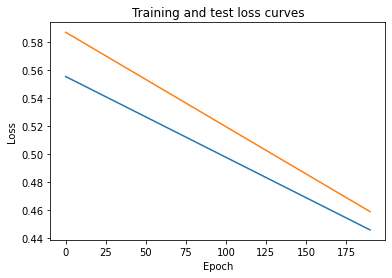

In [24]:
import numpy as np
plt.plot(epoch_count,torch.tensor(loss_values).numpy(), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")

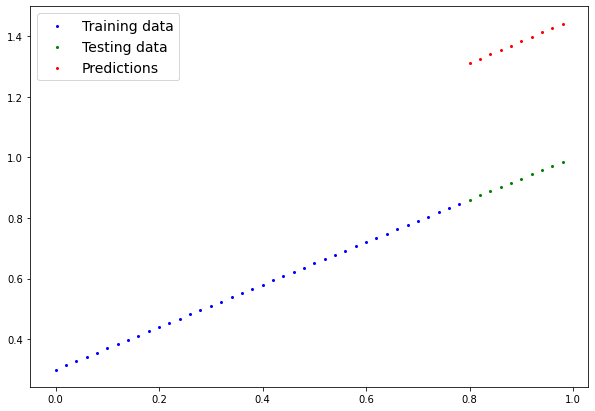

In [25]:
plot_predictions(predictions=test_pred)